# Heart Attack Analysis & Prediction Dataset

هدف از این پروژه پیشبینی حمله قلبی براساس مدل های نظریه یادگیری میباشد، که در [این مجموعه داده](https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset)، استفاده می شود.

## درباره این مجموعه داده


    Age: سن بیمار
    Sex: جنسیت بیمار
    exang: آنژین ناشی از ورزش (1 = بله؛ 0 = خیر)
    ca: تعداد شناورهای اصلی (0-3)
    cp: نوع درد قفسه سینه نوع درد قفسه سینه
    Value 1: آنژین معمولی
    Value 2: آنژین آتیپیک
    Value 3: درد غیر آنژین
    Value 4: بدون علامت
    trtbps: فشار خون در حالت استراحت (به میلی متر جیوه)
    chol: کلسترال به میلی گرم در دسی لیتر که از طریق سنسور BMI دریافت می شود
    fbs: (قند خون ناشتا > 120 mg/dl) (1 = درست؛ 0 = نادرست)
    rest_ecg: نتایج الکتروکاردیوگرافی در حال استراحت
    Value 0: عادی
    Value 1: داشتن ناهنجاری موج ST-T (وارونگی موج T و/یا ارتفاع ST یا فرورفتگی > 0.05 میلی ولت)
    Value 2: نشان دادن هیپرتروفی احتمالی یا قطعی بطن چپ با معیار استس
    thalach: حداکثر ضربان قلب به دست آمده است
    target: 0= احتمال حمله قلبی کمتر 1= احتمال حمله قلبی بیشتر

__Import all required libraries__

In [7]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [8]:
#Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Basic Models
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
import time

#Metrics (Computation)
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV

#Boosting Algorithms
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

#Neural Network Model
from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings("ignore")

__Import Datasets__

In [9]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"fakoor","key":"9f39daf4d0fc46891551828e8f1f2873"}'}

In [10]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

rm: cannot remove '/root/.kaggle': No such file or directory


In [11]:
!kaggle datasets download -d rashikrahmanpritom/heart-attack-analysis-prediction-dataset

  0% 0.00/4.11k [00:00<?, ?B/s]
100% 4.11k/4.11k [00:00<00:00, 5.19MB/s]


In [12]:
!mkdir Dataset
!cp heart-attack-analysis-prediction-dataset.zip heart-attack-analysis-prediction-dataset.zip
!unzip -q heart-attack-analysis-prediction-dataset.zip -d /content/Dataset
!rm heart-attack-analysis-prediction-dataset.zip

cp: 'heart-attack-analysis-prediction-dataset.zip' and 'heart-attack-analysis-prediction-dataset.zip' are the same file


In [13]:
!ls Dataset

heart.csv  o2Saturation.csv


In [14]:
data1=pd.read_csv("Dataset/heart.csv")
data1.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Exploratory Data Analysis and Statistical Analysis (EDA)

In [15]:
display(data1.describe())
display(data1.info())

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


None

واضح است که هیچ مقدار تهی در مجموعه داده همانطور که در بالا مشاهده شد وجود ندارد، بنابراین ما نیازی به تلقی از هیچ ستونی برای مقادیر تهی نداریم.

1    165
0    138
Name: output, dtype: int64


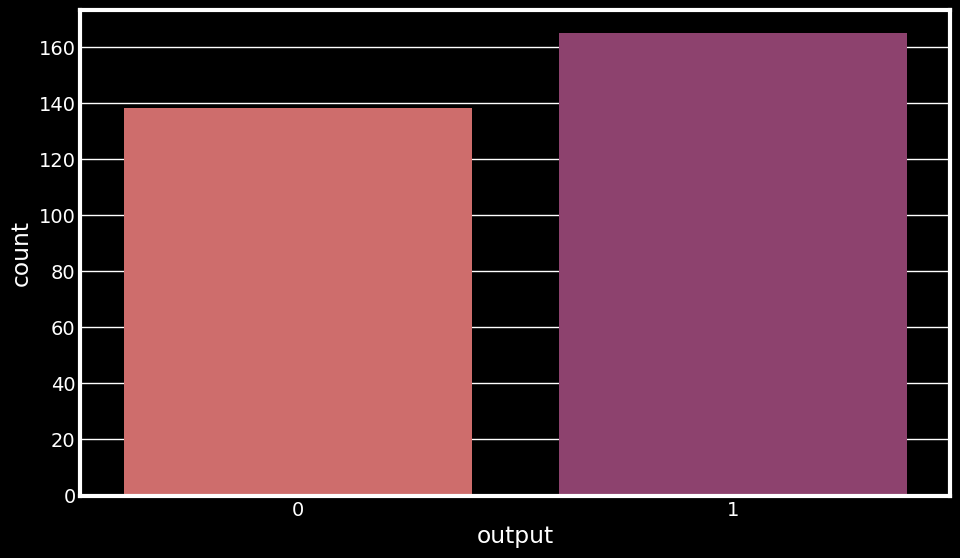

In [16]:
#Output variable

print(data1['output'].value_counts())
fig = plt.figure(figsize = (10,6))

sns.countplot(data=data1, x=data1['output'], palette='flare')
plt.show()


ax=px.pie(data1, names= "output" ,template= "plotly_dark",title="Output",hole=0.8)
ax.show()

با مشاهده پارامتر هدف این مجموعه داده داریم:
"1" نشان می دهد که فرد در معرض خطر بیشتری برای تجربه حمله قلبی است و به طور مشابه "0" خطر کمتری را نشان می دهد.
بنابراین در این مجموعه داده، افراد بیشتری در خطر بالا (54.5٪) و افراد کمتری در خطر کم (45.5٪) قرار دارند که در نمودار پای مشاهده شد.

همانطور که متوجه شده اید این مجموعه داده دارای 2 نوع داده معمولی است، داده های طبقه بندی شده و داده های پیوسته. ما نمی‌توانیم این داده‌ها را با هم تجزیه و تحلیل کنیم زیرا دسته‌بندی و مقادیر پیوسته ویژگی‌های متفاوتی دارند. بیایید ابتدا نام این ستون ها را جداگانه ذخیره کنیم تا بتوانیم به راحتی به آنها دسترسی داشته باشیم.

In [17]:
#Classification columns
class_cols=["sex","output",'cp',"fbs","exng","restecg","thall","caa","slp"]
class_data=data1[class_cols]

#Continuous columns
continuous_cols=["age","trtbps","chol","thalachh","oldpeak"]
continuous_data=data1[continuous_cols]

#### مردها یا زن ها !؟

مجموعه داده دارای یک ستون "جنسیت" است تا بیماران را بر اساس جنسیت در دسته 1 یا 0 طبقه بندی کند. با این حال، به این اشاره نمی‌شود که 1 نشان‌دهنده مذکر یا مؤنث و یکسان برای 0 است. <br><br>

با بررسی شواهد برای این تخقیق داریم

> __طبق [گزارش](https://www.health.harvard.edu/heart-health/throughout-life-heart-attacks-are-twice-as-common-in-men-than-women) بخش بهداشت هاروارد:__ <br>
> محققان دریافتند که در طول زندگی، مردان تقریباً دو برابر زنان در معرض حمله قلبی بودند. این خطر بالاتر حتی پس از اینکه آنها عوامل خطر سنتی بیماری قلبی، از جمله کلسترول بالا، فشار خون بالا، دیابت، شاخص توده بدنی و فعالیت بدنی را در نظر گرفتند، ادامه داشت. <br><br>

می‌توانیم از این اطلاعات برای اینکه بفهمیم کدام برچسب مخفف کدام جنسیت است، استفاده کنیم. این اساساً به این معنی است که جنسیتی که میانگین خطر ابتلا به سکته قلبی را دارد بیشتر احتمال دارد مرد باشد. ما داده هایی برای یافتن این درصد ریسک داریم، فقط باید آن را به صورت زیر محاسبه کنیم.

In [18]:
#Divide the data based on sex variable
X=data1[data1["sex"]==1].reset_index()  
Y=data1[data1["sex"]==0].reset_index()   
display(X.head(),Y.head())

,index,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
3,5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
4,7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1


,index,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
1,4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
2,6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
3,11,48,0,2,130,275,0,1,139,0,0.2,2,0,2,1
4,14,58,0,3,150,283,1,0,162,0,1.0,2,0,2,1


In [19]:
ax= px.pie(data1, names= "sex",template= "plotly_dark",title= "Gender distribution",hole= 0.5)
ax.show()

این نمودار دایره ای نشان می دهد که بیش از 68٪ بیماران به یک جنسیت (مرد یا زن) تعلق دارند در حالی که بقیه به جنسیت دیگر (31.7٪) تعلق دارند.

فقط باید پیدا کنیم که کدام کدام است. برای آن اجازه می دهد درصد ریسک بالا را برای هر دو برچسب (1 و 0) محاسبه کنیم.

In [20]:
print("Percent of '1' at high risk of heart attack = {} %" .format(round((len(X[X["output"]==1])/len(X)*100),2)))
print("'1' average high-risk age = {} yrs\n" .format(round(X[X["output"]==1]["age"].mean())))

print("Percent of '0' at high risk of heart attack = {} %" .format(round((len(Y[Y["output"]==1])/len(Y)*100),2)))
print("Average high-risk age = {} yrs" .format(round(Y[Y["output"]==1]["age"].mean())))

Percent of '1' at high risk of heart attack = 44.93 %
'1' average high-risk age = 51 yrs

Percent of '0' at high risk of heart attack = 75.0 %
Average high-risk age = 55 yrs


این نشان می دهد که برای جنس "1"، 44.93٪ در معرض خطر بالای حمله قلبی هستند در حالی که برای جنسیت "0"، 75.0٪ در معرض خطر بالاتری هستند.

بر اساس این محاسبه و نظرسنجی محققان هاروارد، می‌توان نتیجه گرفت که برچسب جنسی "0" در مجموعه داده برای مردان است در حالی که برچسب "1" برای زنان است زیرا برچسب "0" بیشتر مستعد ابتلا به حمله قلبی است. (75.0%)

از آنجایی که موفق شدیم بفهمیم کدام برچسب مربوط به کدام جنسیت است، اکنون می‌توانیم داده‌های مرد در مقابل زن را تجسم کنیم.

Female Value Counts: 
0    114
1     93
Name: output, dtype: int64
Male Value Counts: 
1    72
0    24
Name: output, dtype: int64


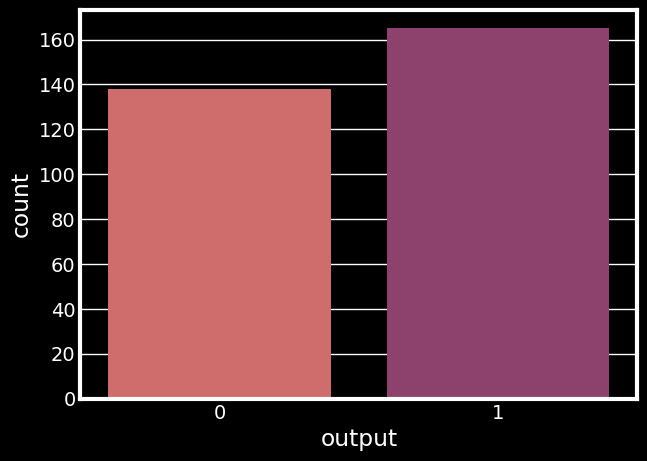

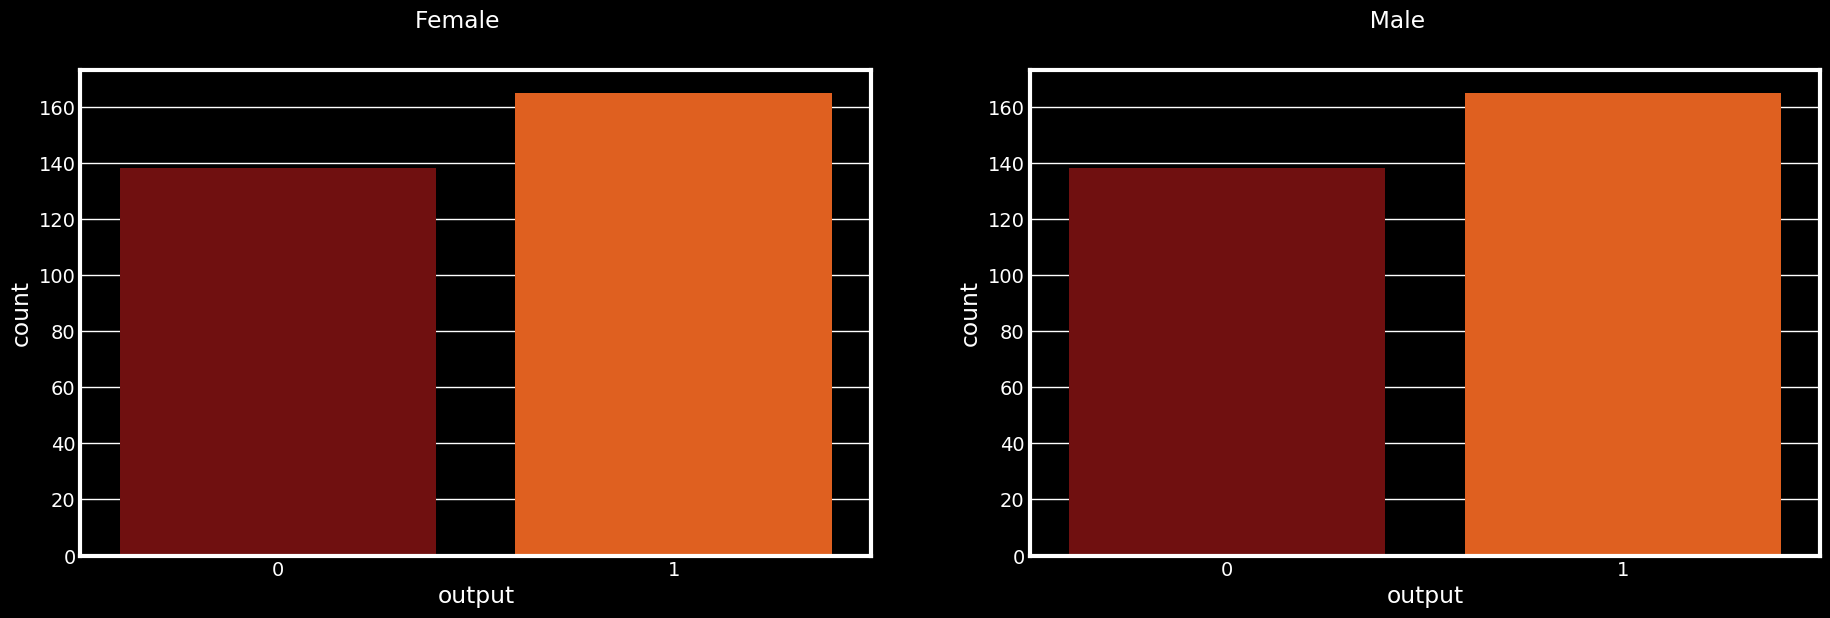

In [21]:
print("Female Value Counts: \n{}".format(X['output'].value_counts()))
print("Male Value Counts: \n{}".format(Y['output'].value_counts()))

sns.countplot(data=data1, x=data1['output'], palette='flare')

fig, ax1 = plt.subplots(1,2, figsize=(20,6))
plt.suptitle("Female                                                                                                                      Male")
sns.countplot(data=X, x=data1['output'], palette='gist_heat',ax=ax1[0])
sns.countplot(data=Y, x=data1['output'], palette='gist_heat',ax=ax1[1])
fig.show()

> این یک راه عالی برای مشاهده داده ها و آمارهای آن مانند **میانگین، حداکثر، حداقل، و چارک ها** تنها با شناور کردن روی نمودارها است.

همانطور که مشاهده می کنیم تعداد زنان بیشتری نسبت به مردان در تحقیق شرکت کردند و همچنین دامنه زنان (77-29 سال) در مقایسه با (76-34 سال) در مردان بیشتر بود.

In [22]:
fig=go.Figure()
fig.add_trace(go.Box(y=Y["age"],name="Male",marker_color="blue",boxpoints="all",whiskerwidth=0.3))
fig.add_trace(go.Box(y=X["age"],name="Female",marker_color="#e75480",boxpoints="all",whiskerwidth=0.3))
fig.update_layout(template="plotly_dark",title="Age Distribution",height=600)
fig.show()

**sunburst نمودار**<br>

> این نمودار شکل خاص تری از نمایش داده است، که دیتا را بصورت طبقه بندی از ریشه تا برگ، در دایره و بصورت شعاعی، نشان می دهد.
بخش های هر طبقه با برچسبها و نام والد هر بخش مشخص شده. ریشه از ابتدا در مرکز شروع میشود و برگ ها (فرزندان) در حلقه های خارجی به آن اضافه میشوند.

>> در بررسی این مورد ستون والد " جنسیت" است.

In [23]:
class_cols=["output",'cp',"fbs","exng","restecg","thall","caa","slp"]
for col in class_cols:
    ax= px.sunburst(data1, names= col,path= ["sex",col],template= "plotly_dark", title= "{} => Based on Sex".format(col))
    ax.show()

حالا بیایید مقادیر طبقه بندی شده را رسم کنیم، یعنی



 **["output",'cp', "fbs"، "exng"، "restecg", "thall"، "caa"، "slp"]**

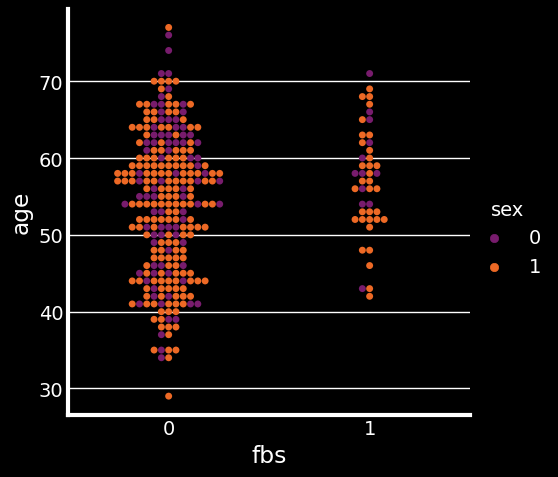

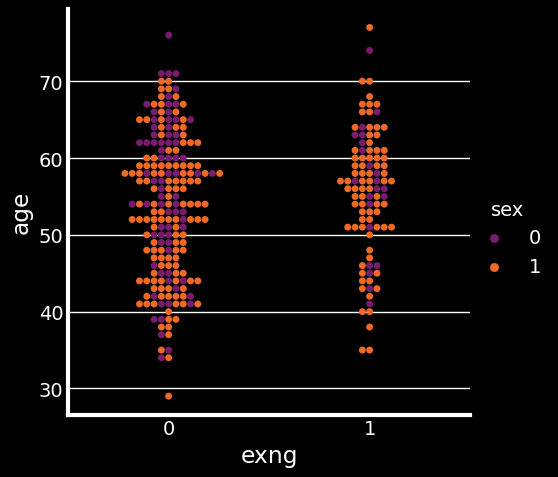

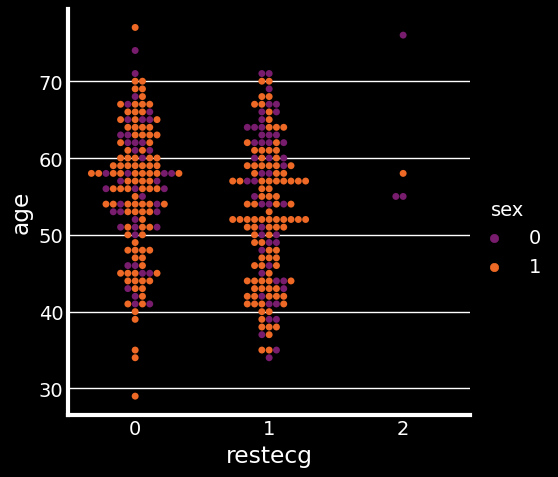

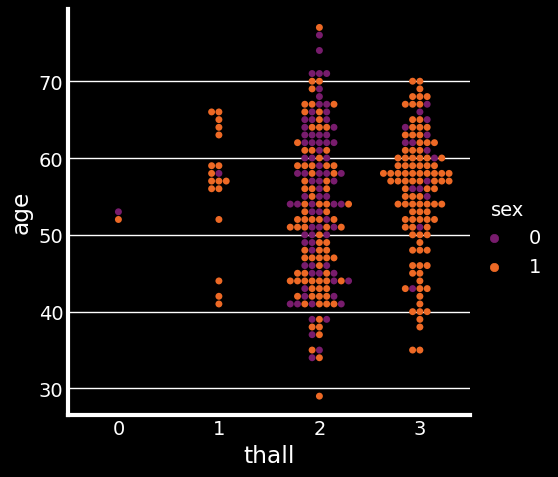

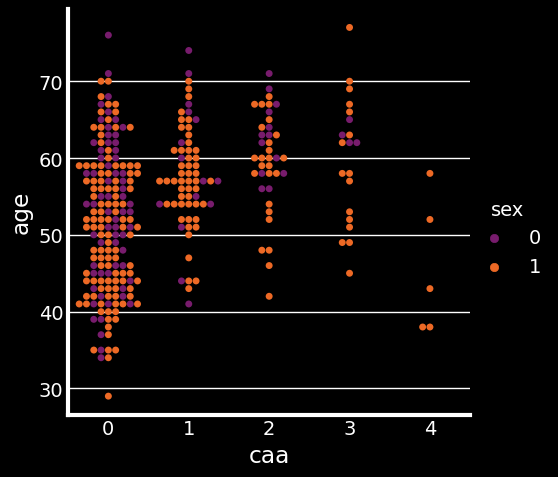

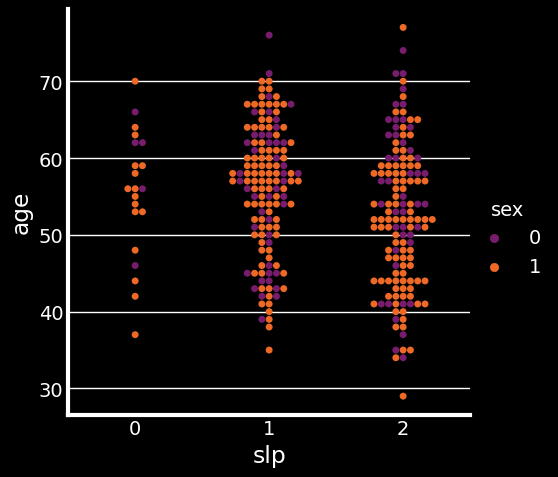

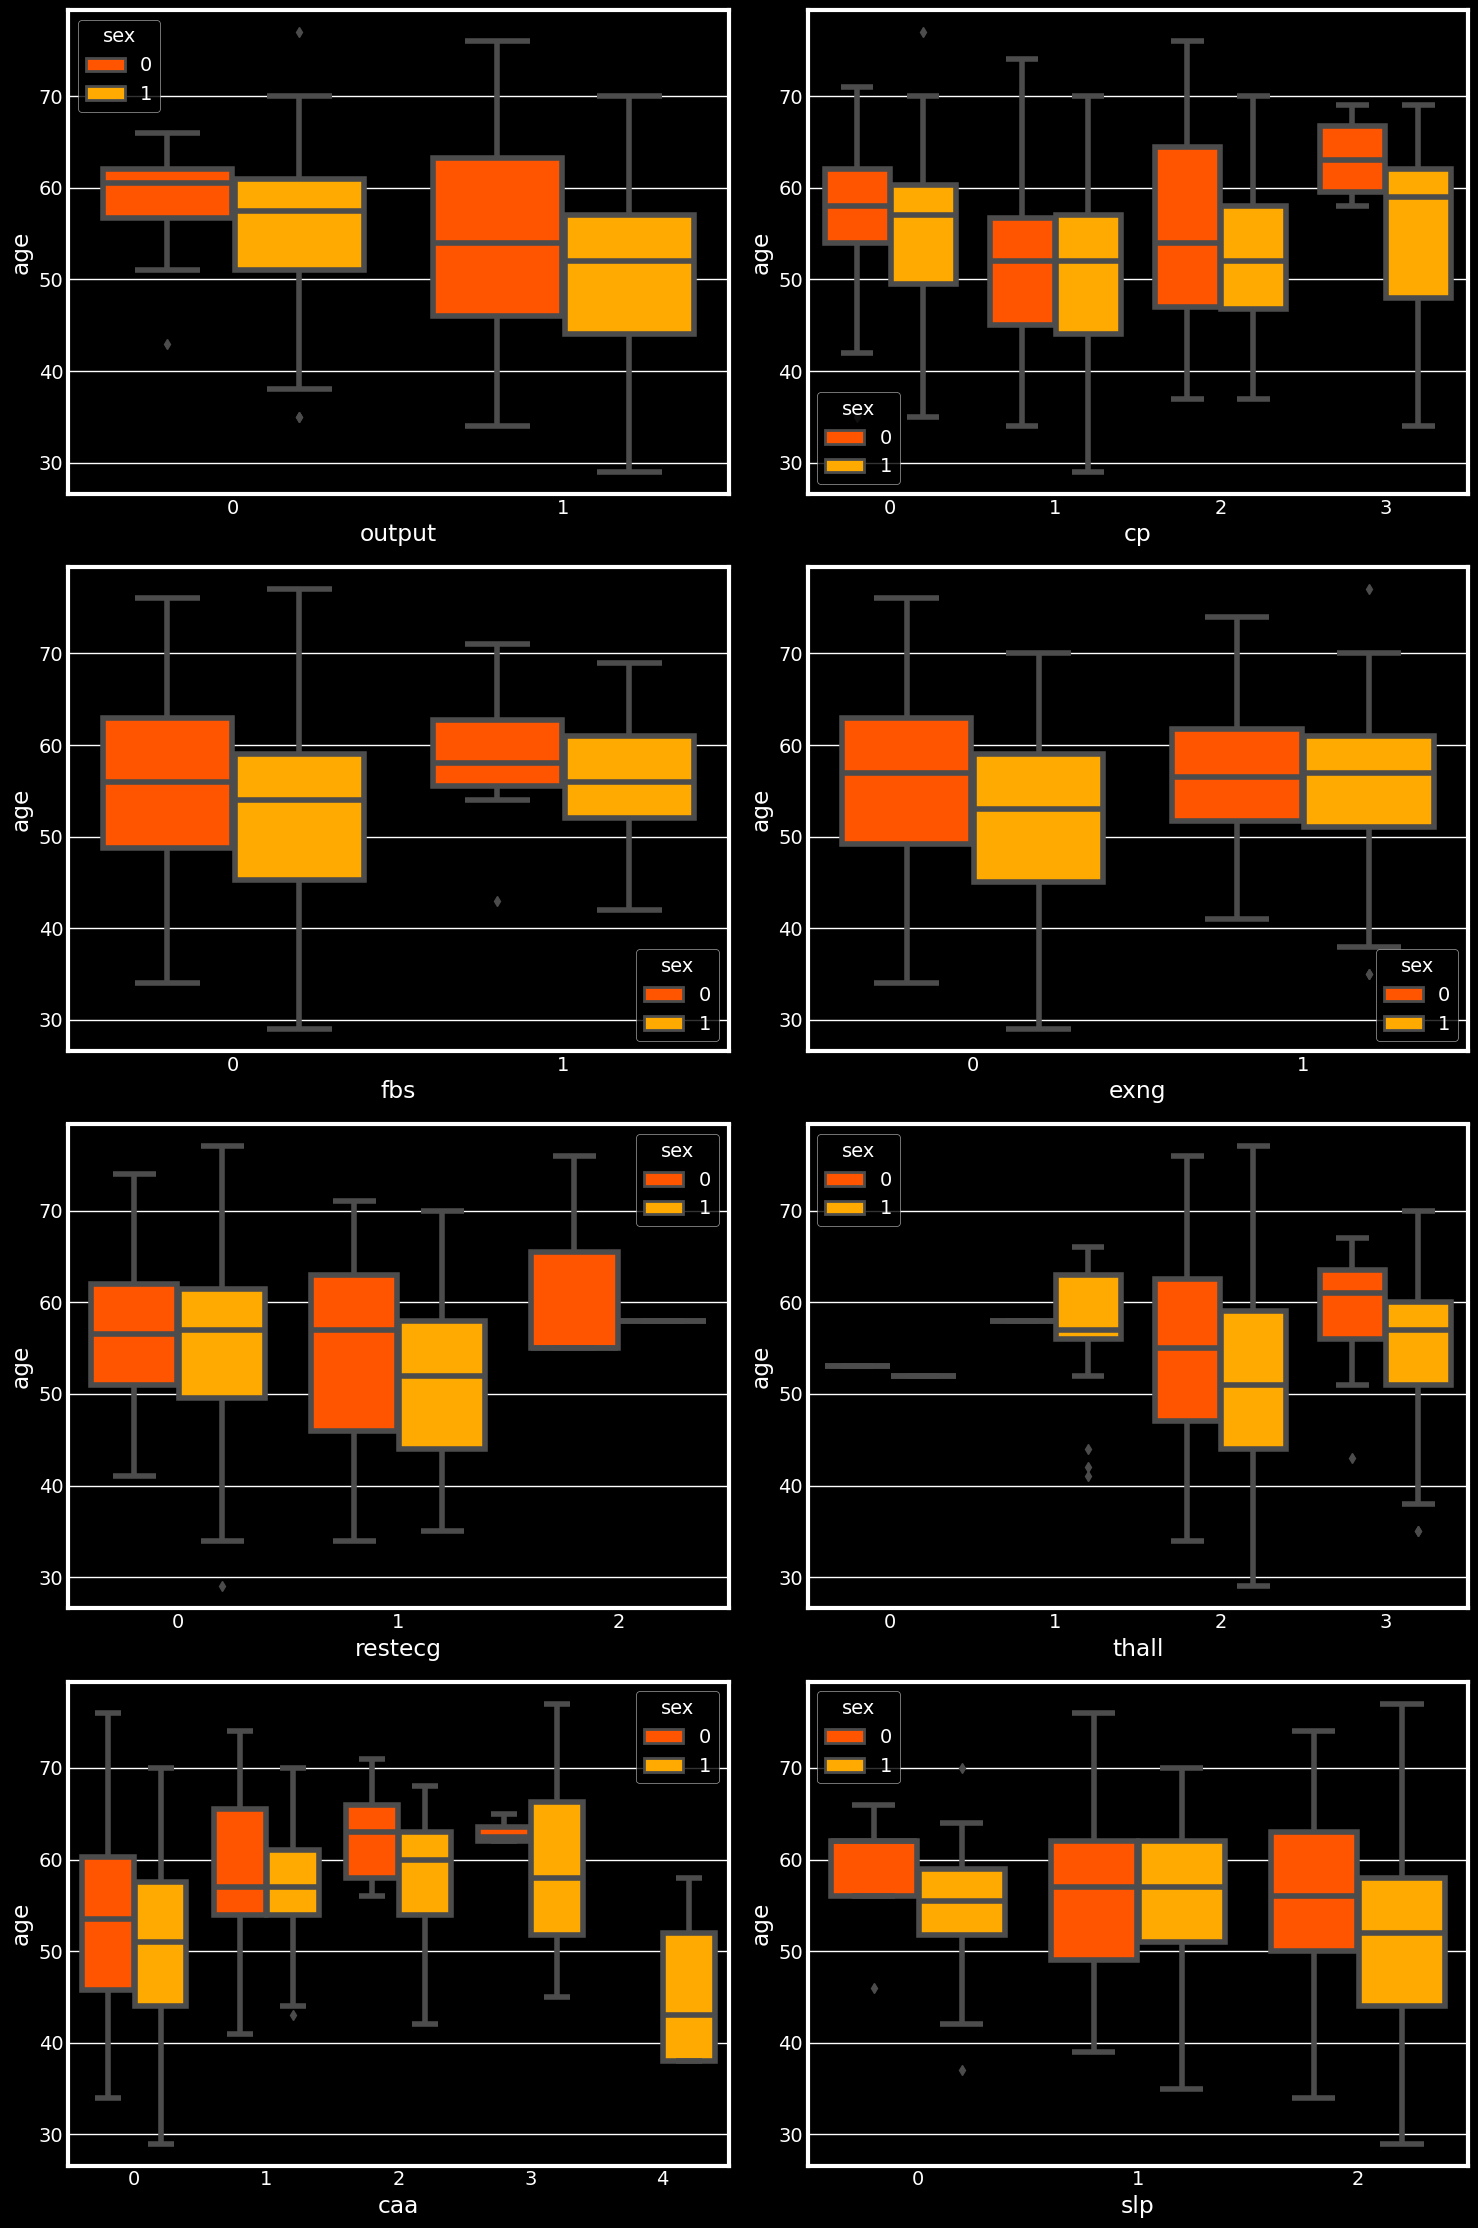

In [24]:
#Pie plots 
for col in class_cols[2:]:
    ax=px.pie(data1, names= col ,template= "plotly_dark",title=col,hole=0.7)
    ax.show()
    
#Swarm Plots
for col in class_cols[2:]:
    sns.catplot(kind="swarm", data=data1, x=col, y="age", palette="inferno", hue="sex")
plt.show()
    
fig, ax1 = plt.subplots(4,2, figsize=(15,22.5))
k = 0
for i in range(4):
    for j in range(2):
        sns.boxplot(data=data1,x=class_cols[k],y="age",palette="autumn",hue="sex",saturation=1,ax=ax1[i][j])
        k+=1
plt.tight_layout()
plt.show()

رسم نمودارهای دایره ای و نمودارهای پراکندگی برای متغیرهای پیوسته ما را به جایی نمی رساند، در عوض توزیع چگالی این متغیرها را رسم می کنیم و آنها را تحلیل می کنیم. 

 **["age","trtbps","chol","thalachh","oldpeak"]**

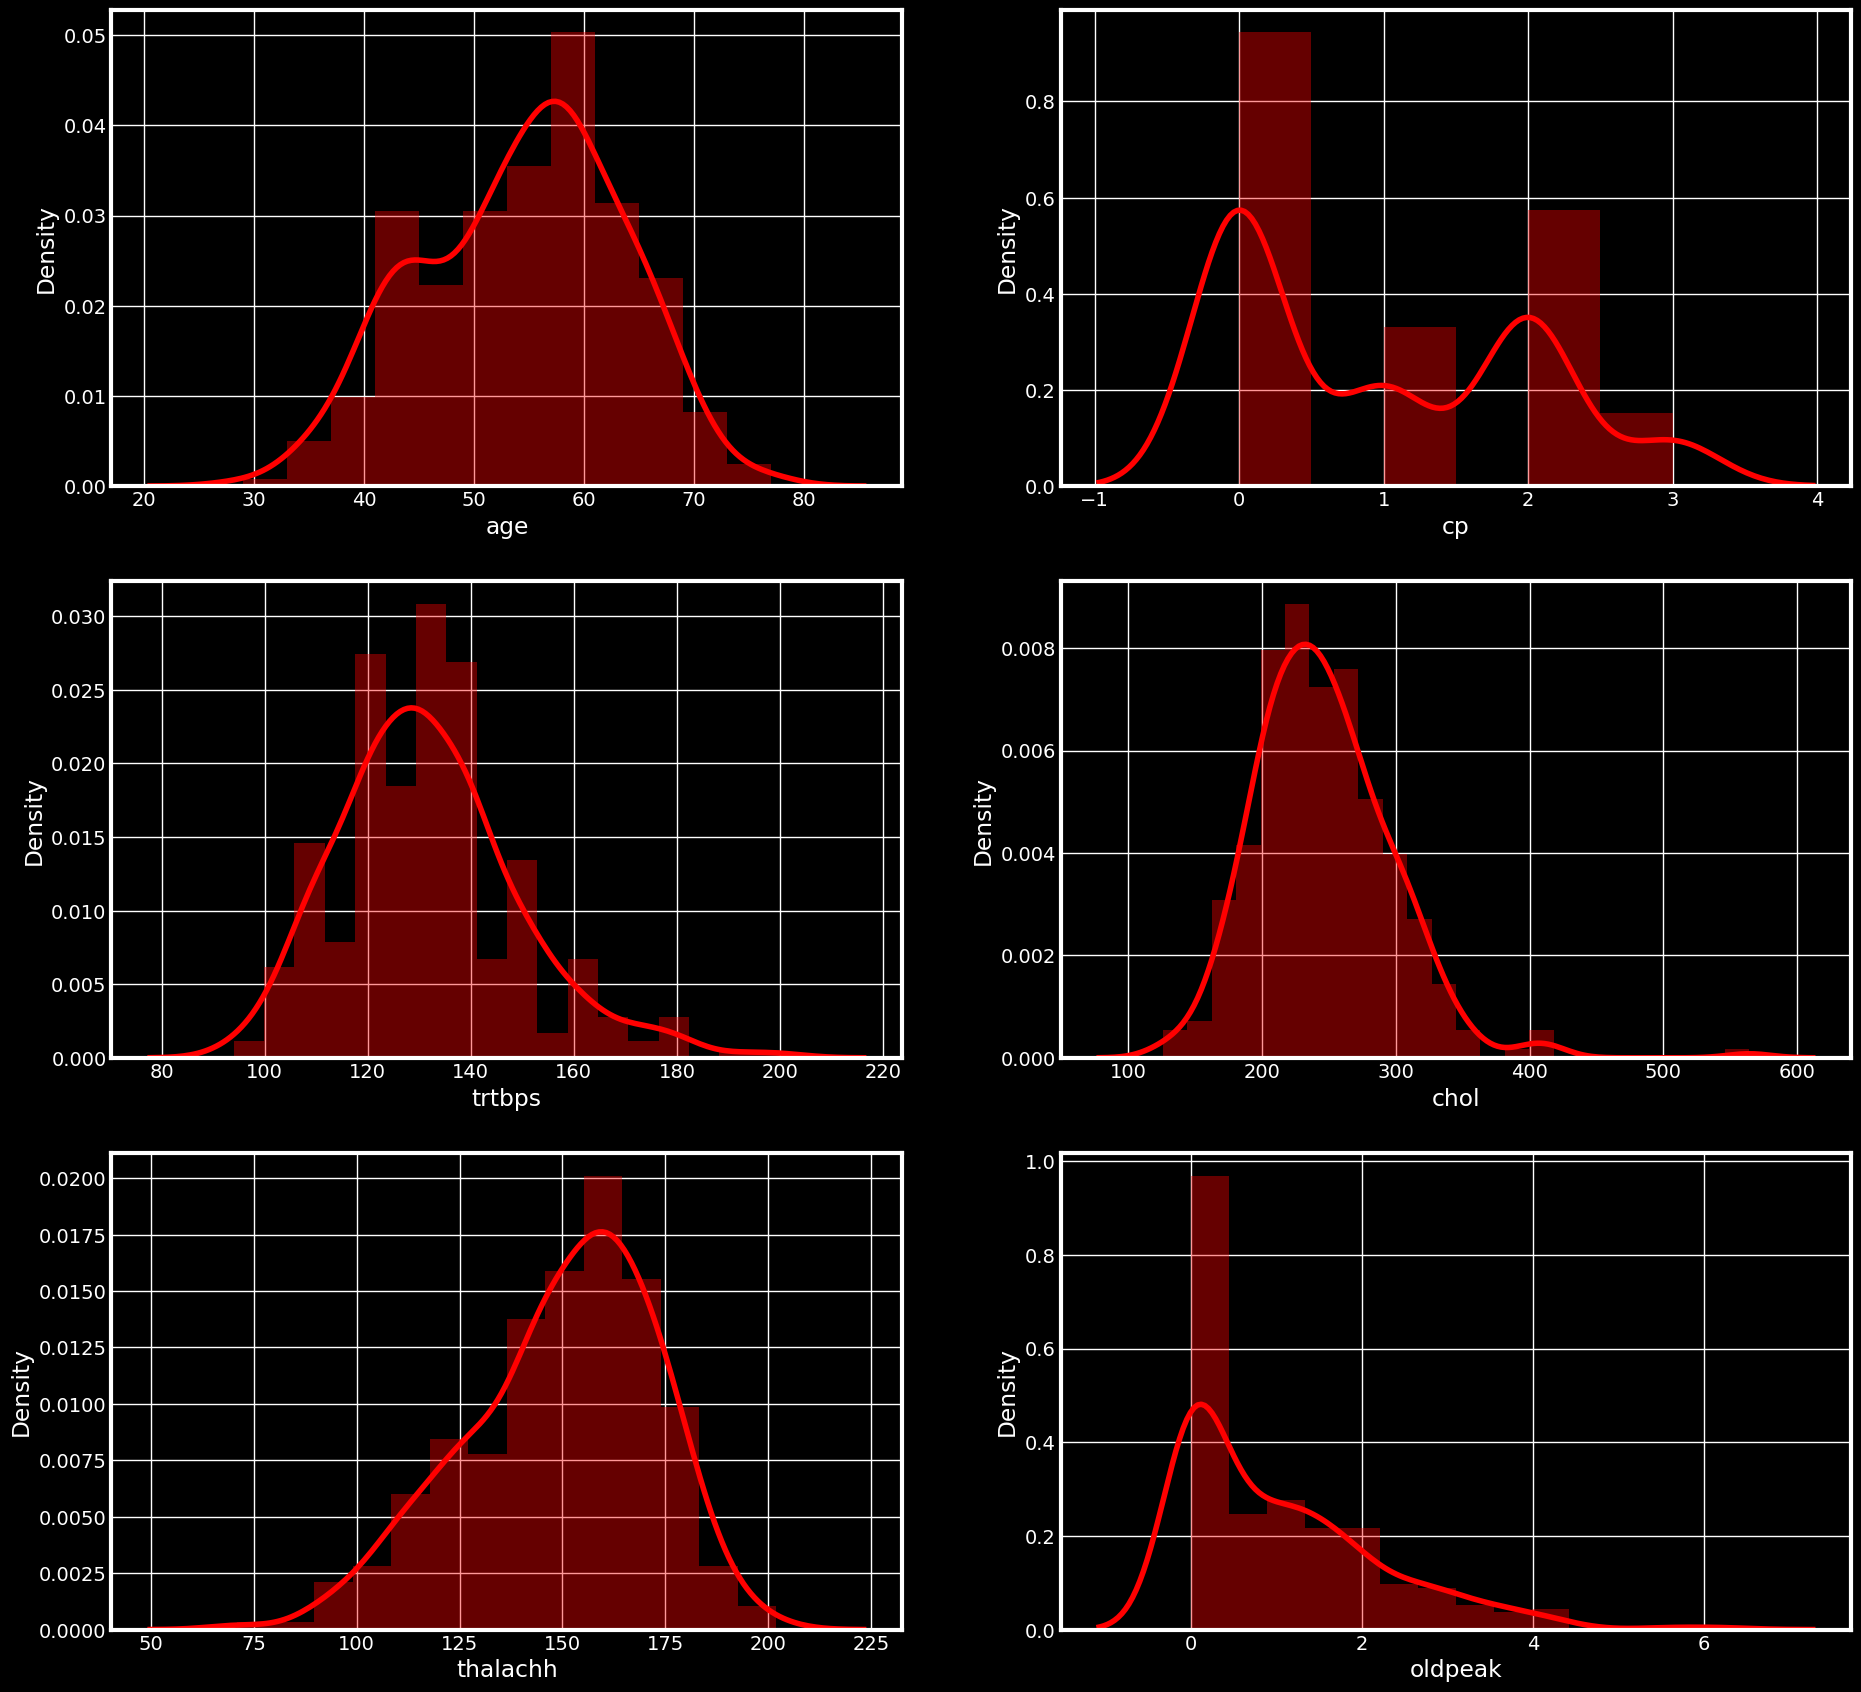

In [25]:
columns=["age","cp","trtbps","chol","thalachh","oldpeak"]
fig, ax1 = plt.subplots(3,2, figsize=(20,20))
k = 0
for i in range(3):
    for j in range(2):
            sns.distplot(data1[columns[k]], ax = ax1[i][j], color = 'red')
            k += 1
plt.show()

بنظر این نمودار خوب به نظر می‌رسند، زیرا هیچ‌یک از آنها به جز 

"oldpeak"

 بیش از حد به چپ یا راست انحراف ندارند.  بعداً هنگام پیش پردازش داده ها، به این ستون ها توجه بیشتری خواهیم کرد.<br><br>
<hr>

#### "Age" EDA

بیایید اکنون ستون سن را دقیق تر تجزیه و تحلیل کنیم. تغییر سن را با توجه به سایر متغیرها مانند "جنس" و "خروجی" رسم خواهیم کرد.

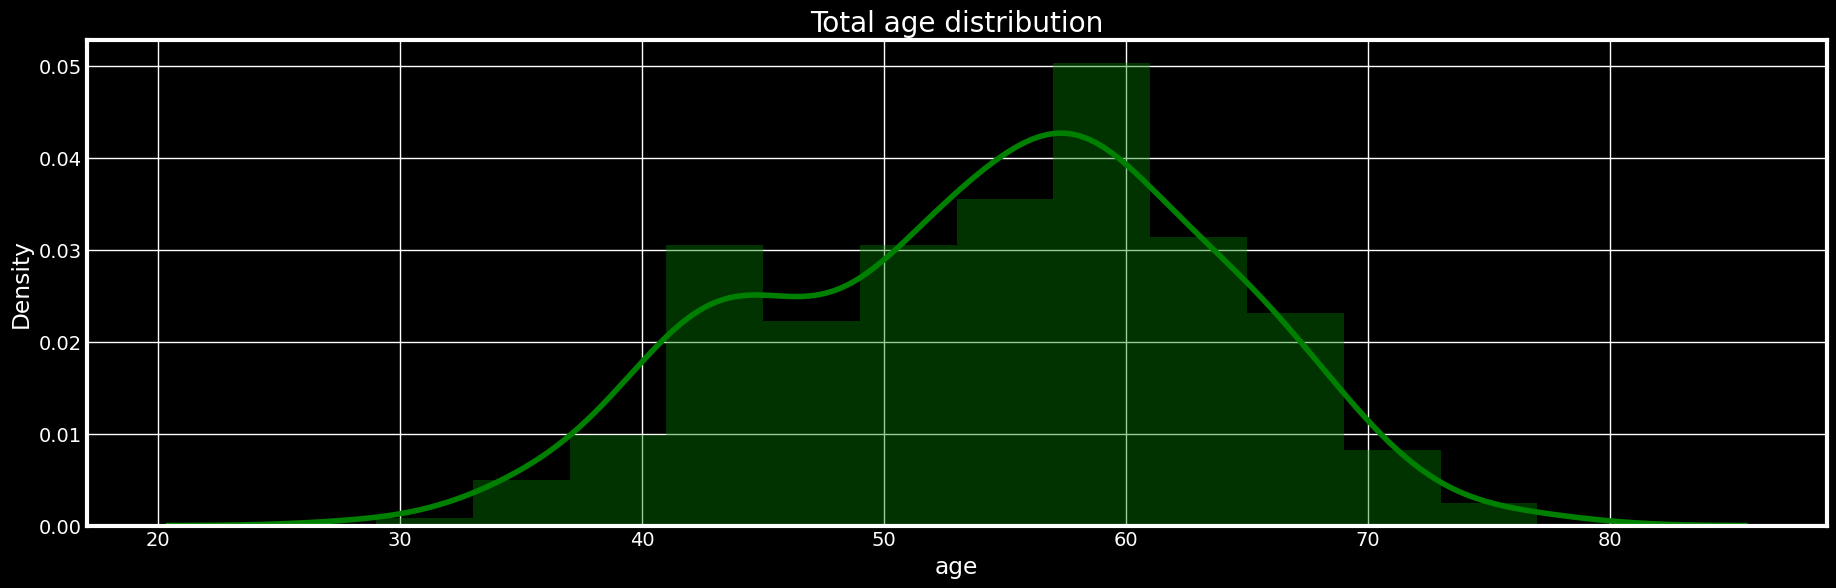

In [26]:
#Distribution plots
plt.figure(figsize=(20,6))
sns.distplot(data1["age"],color="green",bins="auto")
plt.title("Total age distribution")
plt.show()

ax= px.histogram(data1,x= "age", template= "plotly_dark",color= "output",title='Output 0 or 1')
ax.show()

ax= px.histogram(data1,x= "age", template= "plotly_dark",color= "sex",title='Male vs Female age distribution')
ax.show()

**نمودار 1: نمودار اول توزیع کل سن را برای همه افراد در نظرسنجی نشان می دهد. اکثر آنها در گروه سنی 50 تا 60 و تعداد بسیار کمی از دو طرف بودند.<br>
نمودار 2: نمودار دوم توزیع سن را به طور جداگانه برای افراد با ریسک بالاتر (خروجی = 1) و برای افراد با ریسک کمتر (خروجی = 0) نشان می دهد<br>
نمودار 3: نمودار سوم توزیع سن را به طور جداگانه برای زنان (جنس = 1) و مردان (جنس = 0) نشان می دهد<br>**

In [27]:
X=data1[data1["sex"]==1].reset_index()  #Females
Y=data1[data1["sex"]==0].reset_index()   #Males

HR=data1[data1["output"]==1].reset_index()  #High Risk
LR=data1[data1["output"]==0].reset_index()  #Low Risk

#Calculate general characteristics
print("----------------General Data------------------")
print("Total Age =>")
print("Mean: {}".format(round(data1["age"].mean())))
print("Median: {}".format(round(data1["age"].median())))
print("Variance: {}".format(round(data1["age"].var())))
print("Standard Deviation: {}\n".format(round((data1["age"].std()),3)))

# Calculate gender specific characteristics
print("--------------Gender Specific Data-------------------")
print("For MEN =>")
print("Mean: {}".format(round(Y["age"].mean())))
print("Median: {}".format(round(Y["age"].median())))
print("Variance: {}".format(round(Y["age"].var())))
print("Standard Deviation: {}\n\n".format(round((Y["age"].std()),3)))

print("For WOMEN =>")
print("Mean: {}".format(round(X["age"].mean())))
print("Median: {}".format(round(X["age"].median())))
print("Variance: {}".format(round(X["age"].var())))
print("Standard Deviation: {}\n".format(round((X["age"].std()),3)))

# Calculate output specific characteristics
print("------------------Output Specific Data-----------------------")
print("For High Risk =>")
print("Mean: {}".format(round(HR["age"].mean())))
print("Median: {}".format(round(HR["age"].median())))
print("Variance: {}".format(round(HR["age"].var())))
print("Standard Deviation: {}\n\n".format(round((HR["age"].std()),3)))

print("For Low Risk =>")
print("Mean: {}".format(round(LR["age"].mean())))
print("Median: {}".format(round(LR["age"].median())))
print("Variance: {}".format(round(LR["age"].var())))
print("Standard Deviation: {}".format(round((LR["age"].std()),3)))

----------------General Data------------------
Total Age =>
Mean: 54
Median: 55
Variance: 82
Standard Deviation: 9.082

--------------Gender Specific Data-------------------
For MEN =>
Mean: 56
Median: 57
Variance: 89
Standard Deviation: 9.409


For WOMEN =>
Mean: 54
Median: 54
Variance: 79
Standard Deviation: 8.884

------------------Output Specific Data-----------------------
For High Risk =>
Mean: 52
Median: 52
Variance: 91
Standard Deviation: 9.551


For Low Risk =>
Mean: 57
Median: 58
Variance: 63
Standard Deviation: 7.962


## Data Pre-processing || پیش پردازش داده ها


ما با مشاهده همبستگی بین هر ستون و همبستگی خاص با خروجی شروع خواهیم کرد.

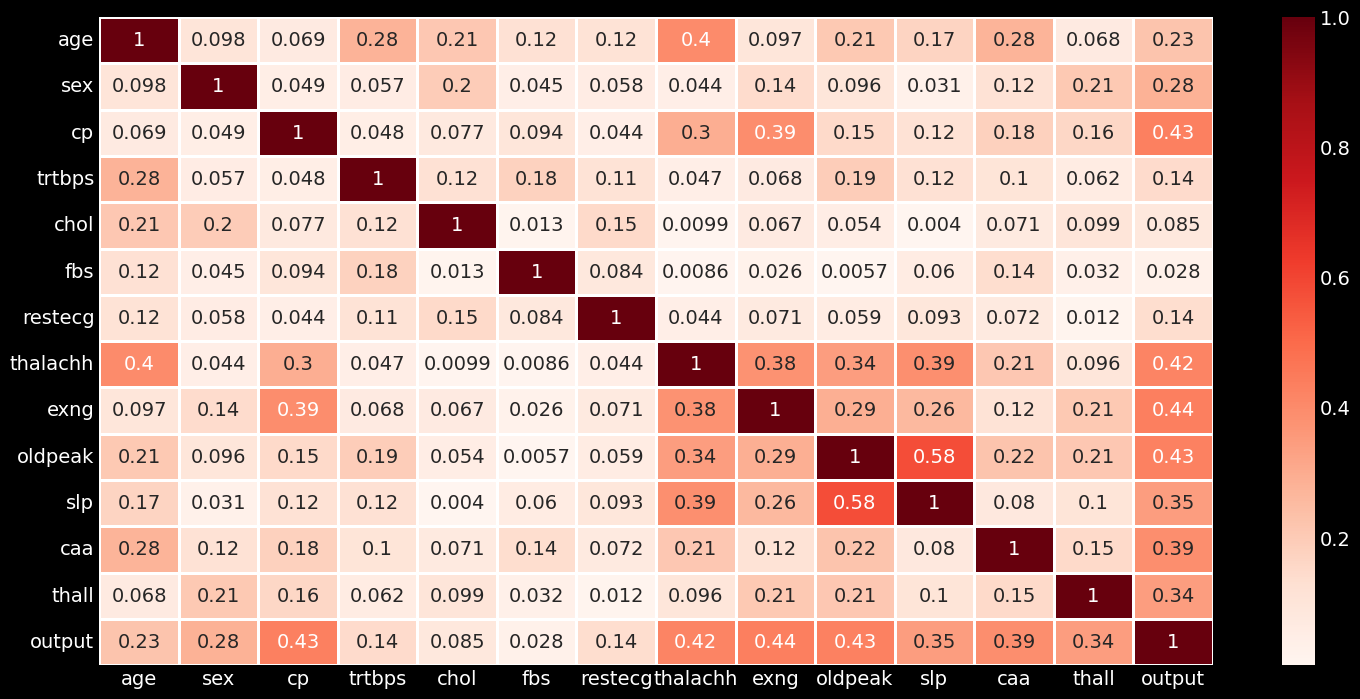

exng        0.436757
cp          0.433798
oldpeak     0.430696
thalachh    0.421741
caa         0.391724
slp         0.345877
thall       0.344029
sex         0.280937
age         0.225439
trtbps      0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: output, dtype: float64


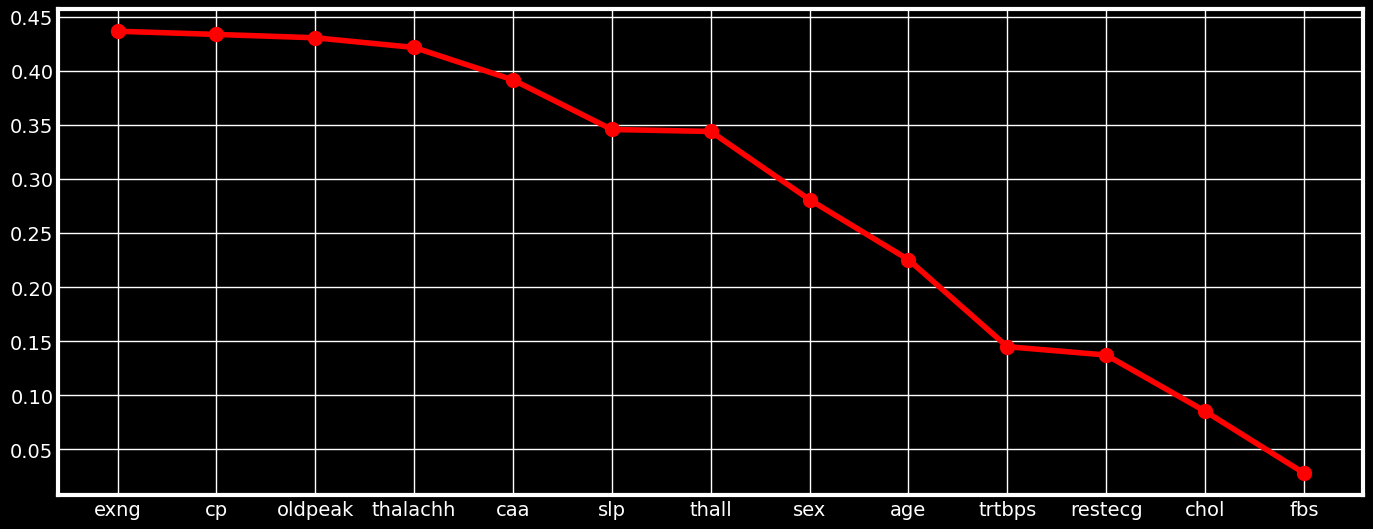

In [28]:
new_df=data1
plt.figure(figsize=(16,8))
corr=new_df.corr()
sns.heatmap(abs(corr),lw=1,annot=True,cmap="Reds")
plt.show()

C=abs(corr["output"]).sort_values(ascending=False)[1:]
print(C)
plt.figure(figsize=(15,6))
plt.plot(C.index,C,color="red")
plt.scatter(C.index,C,color="red",lw=5)
plt.show()

می بینیم که هیچ ستونی با خروجی همبستگی بالایی ندارد، با حداکثر همبستگی

**0.436757**

برای

"exng"

  و حداقل همبستگی از


**0.028046**

  برای

"fbs".

به هر حالا به فراید ادامه میدهیم و از همه این ویژگی ها برای مدل خود استفاده خواهیم کرد.

**سپس اوتلایر های هر ویژگی را بررسی میکنیم**<br>
 از روش

 IQR (Inter-Quartile Range) 
 
 برای شناسایی 
 
 outliners

 و برای نمایش آنها از نمودار جعبه ای استفاده میکنیم.

In [29]:
continuous_cols=["age","trtbps","chol","thalachh","oldpeak"]
continuous_data=data1[continuous_cols]

for k, v in continuous_data.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(data1)[0]
        print("Column {} outliers = {} => {}%".format(k,len(v_col),round((perc),3)))

Column age outliers = 0 => 0.0%
Column trtbps outliers = 13 => 4.29%
Column chol outliers = 5 => 1.65%
Column thalachh outliers = 1 => 0.33%
Column oldpeak outliers = 8 => 2.64%


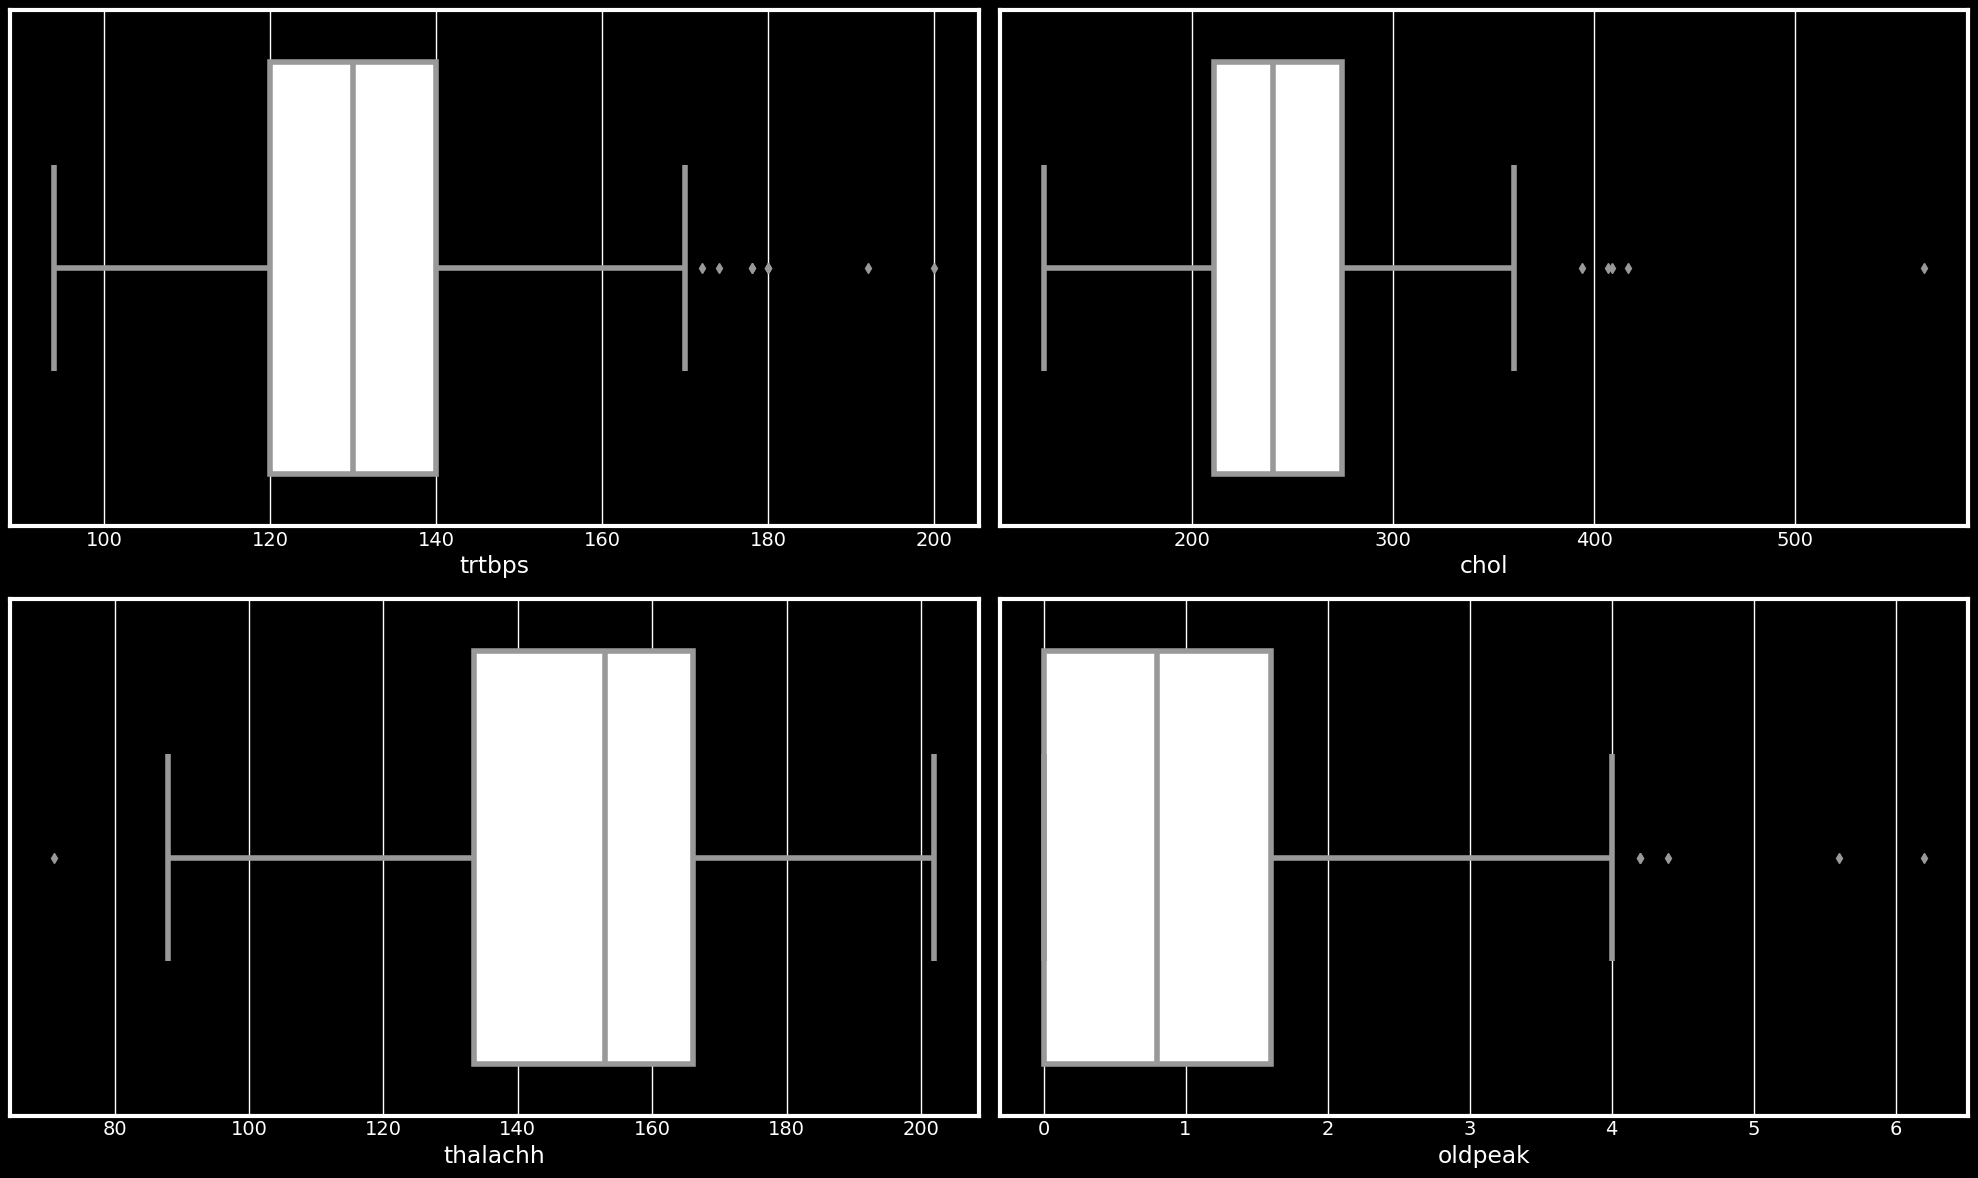

Outliners Present at position: 

trtbps: (array([  8, 101, 110, 152, 195, 203, 223, 228, 241, 248, 260, 266, 292]),)
chol: (array([ 28,  85,  96, 220, 246]),)
thalachh: (array([272]),)
oldpeak: (array([101, 204, 221, 250, 291]),)


In [30]:
fig, ax1 = plt.subplots(2,2, figsize=(20,12))
k = 0
for i in range(2):
    for j in range(2):
        sns.boxplot(data=data1,x=data1[continuous_cols[1:][k]],saturation=1,ax=ax1[i][j],color="white")
        k+=1
plt.tight_layout()
plt.show()

#Display the position of outliners.
print("Outliners Present at position: \n")
print("trtbps: {}".format(np.where(data1['trtbps']>165)))
print("chol: {}".format(np.where(data1['chol']>360)))
print("thalachh: {}".format(np.where(data1['thalachh']<80)))
print("oldpeak: {}".format(np.where(data1['oldpeak']>4)))

واضح است که موارد پرت زیادی وجود ندارد، اما هنوز باید تلاش کنیم تا آنجا که می توانیم آنها را به حداقل برسانیم. می‌توانیم گزارش این ستون‌ها را بگیریم تا همه مقادیر را در یک محدوده بیاوریم و نقاط پرت را به حداقل برسانیم.


minimize the outliers

In [31]:
#Using log transformation
data1["age"]= np.log(data1.age)
data1["trtbps"]= np.log(data1.trtbps)
data1["chol"]= np.log(data1.chol)
data1["thalachh"]= np.log(data1.thalachh)
print("---Log Transform performed---")

#Outliners again
continuous_cols=["age","trtbps","chol","thalachh","oldpeak"]
continuous_data=data1[continuous_cols]

for k, v in continuous_data.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(data1)[0]
        print("Column {} outliers = {} => {}%".format(k,len(v_col),round((perc),3)))

---Log Transform performed---
Column age outliers = 1 => 0.33%
Column trtbps outliers = 9 => 2.97%
Column chol outliers = 6 => 1.98%
Column thalachh outliers = 6 => 1.98%
Column oldpeak outliers = 8 => 2.64%


با مشاهده 

log 

از

outliners 

پس از تغییر (حذف)
را میبینیم، داریم



**تقسیم داده ها و مقیاس بندی:**<br>
ما داده ها را با استفاده از 

train_test_split 

از 

*sklearn.preprocessing*

 به مجموعه های آموزشی و آزمایشی تقسیم می کنیم. پس از تقسیم، داده های خود را با استفاده از مقیاس کننده
 
  MinMax 
  
  قبل از استفاده از آن برای آموزش مدل خود مقیاس می کنیم.

In [32]:
#Data Splitting
X=data1.iloc[:,:13]
Y=data1["output"]

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=65) 

#MinMax Scaling / Normalization of data
MM_scaler = MinMaxScaler()
X_train = MM_scaler.fit_transform(X_train)
X_test = MM_scaler.fit_transform(X_test)

**نمایش تابع برای رسم و محاسبه داده ها. **<br>
ما از این تابع برای هر مدل به طور جداگانه استفاده خواهیم کرد.

In [33]:
def compute(Y_pred,Y_test):
    #Output plot
    plt.figure(figsize=(12,6))
    plt.scatter(range(len(Y_pred)),Y_pred,color="yellow",lw=5,label="Predictions")
    plt.scatter(range(len(Y_test)),Y_test,color="red",label="Actual")
    plt.title("Prediction Values vs Real Values")
    plt.legend()
    plt.show()

    cm=confusion_matrix(Y_test,Y_pred)
    class_label = ["High-risk", "Low-risk"]
    df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
    sns.heatmap(df_cm,annot=True,cmap='Pastel1',linewidths=2,fmt='d')
    plt.title("Confusion Matrix",fontsize=15)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    #Calculate Metrics
    acc=accuracy_score(Y_test,Y_pred)
    mse=mean_squared_error(Y_test,Y_pred)
    precision, recall, fscore, train_support = score(Y_test, Y_pred, pos_label=1, average='binary')
    print('Precision: {} \nRecall: {} \nF1-Score: {} \nAccuracy: {} %\nMean Square Error: {}'.format(
        round(precision, 3), round(recall, 3), round(fscore,3), round((acc*100),3), round((mse),3)))

## 1 => Logistic Regression

Execution time of model: 0.02071 seconds



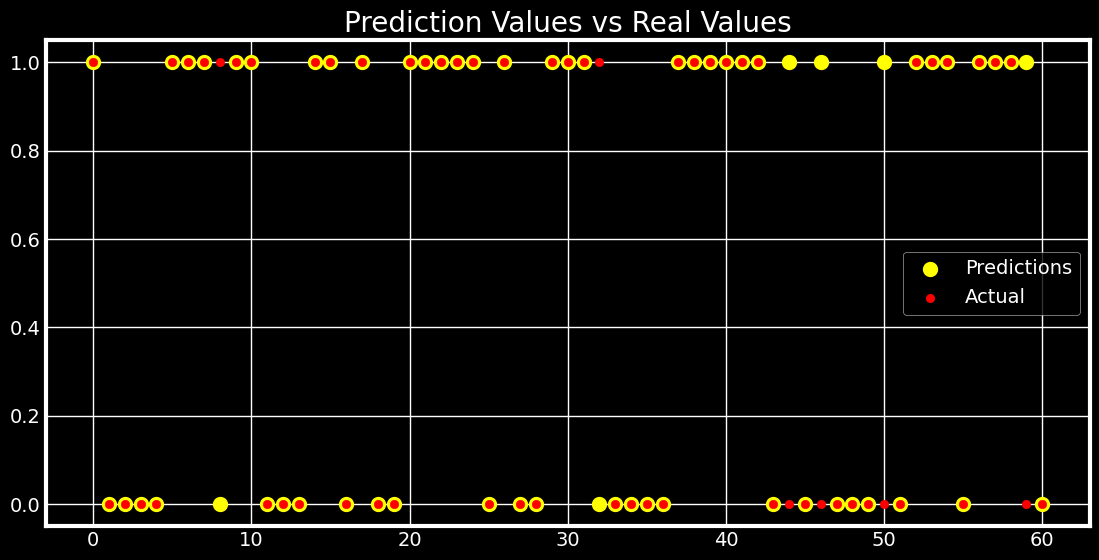

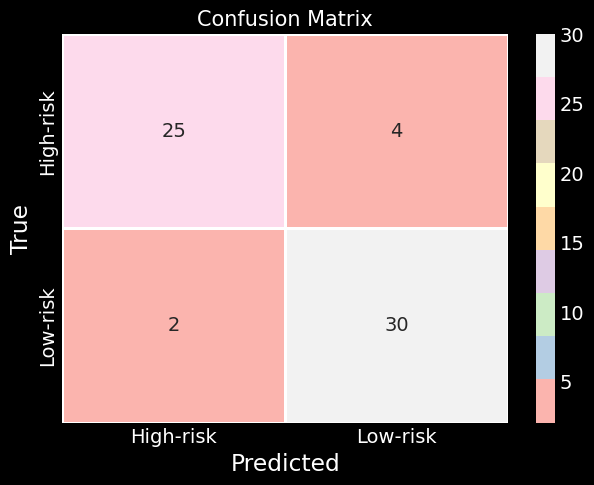

Precision: 0.882 
Recall: 0.938 
F1-Score: 0.909 
Accuracy: 90.164 %
Mean Square Error: 0.098


In [34]:
#Build Model
start = time.time()

model_Log= LogisticRegression(random_state=10)
model_Log.fit(X_train,Y_train)
Y_pred= model_Log.predict(X_test)

end=time.time()

model_Log_time=end-start
model_Log_accuracy=round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy

print(f"Execution time of model: {round((model_Log_time),5)} seconds\n")
#Plot and compute metrics
compute(Y_pred,Y_test)

## 2 => K-Nearest Neighbours (K-NN)

Execution time of model: 0.00845 seconds


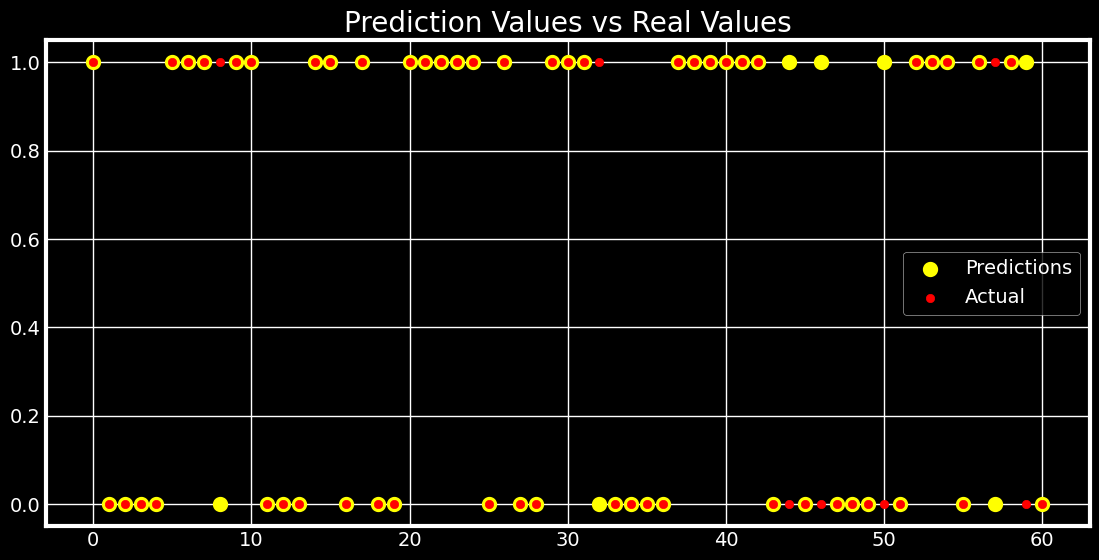

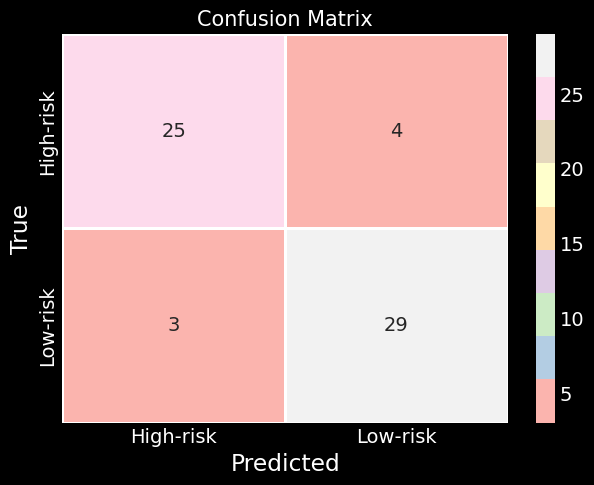

Precision: 0.879 
Recall: 0.906 
F1-Score: 0.892 
Accuracy: 88.525 %
Mean Square Error: 0.115


In [35]:
#Build Model
start=time.time()

model_KNN = KNeighborsClassifier(n_neighbors=15)
model_KNN.fit(X_train,Y_train)
Y_pred = model_KNN.predict(X_test)

end=time.time()

model_KNN_time = end-start
model_KNN_accuracy=round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy

print(f"Execution time of model: {round((model_KNN_time),5)} seconds")
#Plot and compute metric
compute(Y_pred,Y_test)

## 3 => Support Vector Machines (SVM)

Execution time of model: 0.00507 seconds


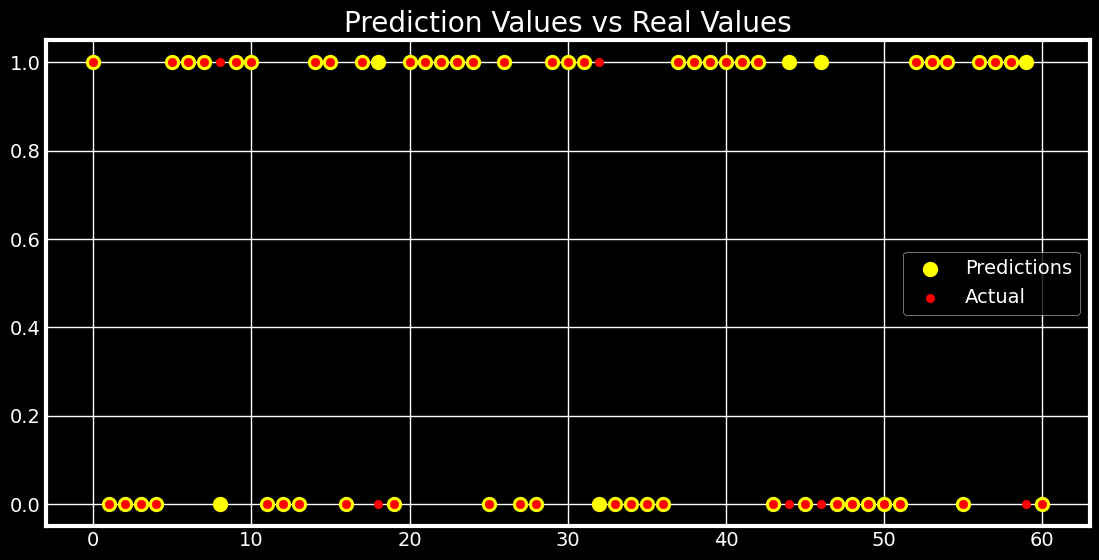

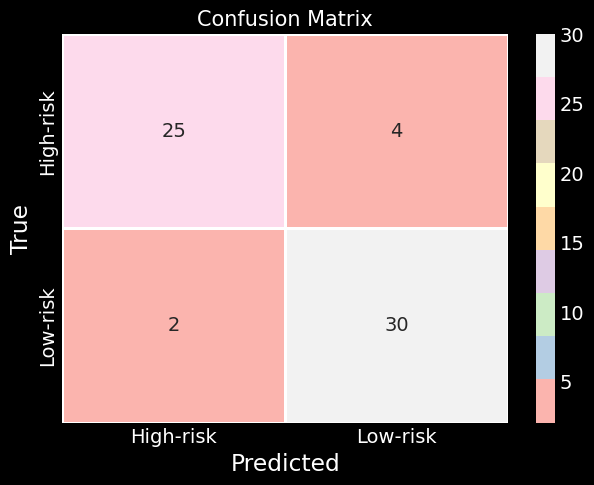

Precision: 0.882 
Recall: 0.938 
F1-Score: 0.909 
Accuracy: 90.164 %
Mean Square Error: 0.098


In [36]:
#Build Model
start=time.time()

model_svm=SVC(kernel="rbf")
model_svm.fit(X_train,Y_train)
Y_pred=model_svm.predict(X_test)

end=time.time()

model_svm_time=end-start
model_svm_accuracy=round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy

print(f"Execution time of model: {round((model_svm_time),5)} seconds")
#Plot and compute metric
compute(Y_pred,Y_test)

## 4 => Decision Tree Classifier

Execution time of model: 0.00264 seconds


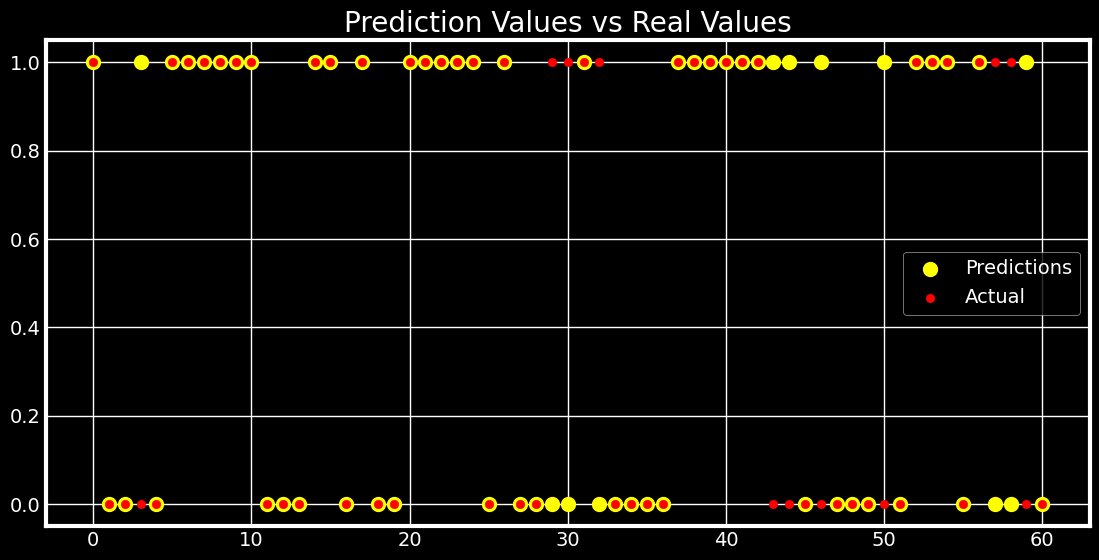

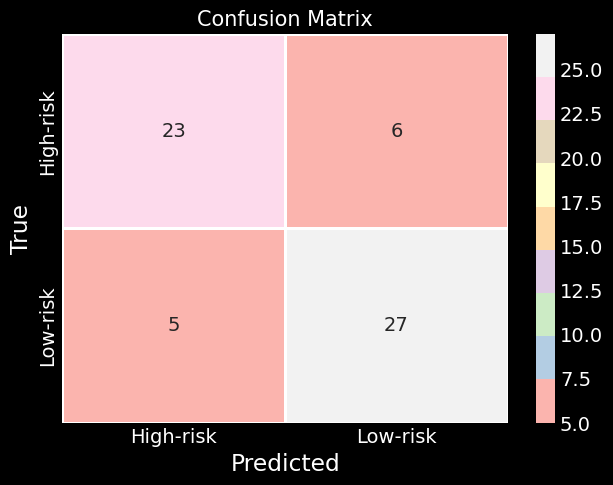

Precision: 0.818 
Recall: 0.844 
F1-Score: 0.831 
Accuracy: 81.967 %
Mean Square Error: 0.18


In [37]:
#Build Model
start=time.time()

model_tree=DecisionTreeClassifier(random_state=10,criterion="gini",max_depth=100)
model_tree.fit(X_train,Y_train)
Y_pred=model_tree.predict(X_test)

end=time.time()

model_tree_time=end-start
model_tree_accuracy=round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy

print(f"Execution time of model: {round((model_tree_time),5)} seconds")
#Plot and compute metric
compute(Y_pred,Y_test)

## 5 => Random Forest Classifier

Execution time of model: 0.40116 seconds


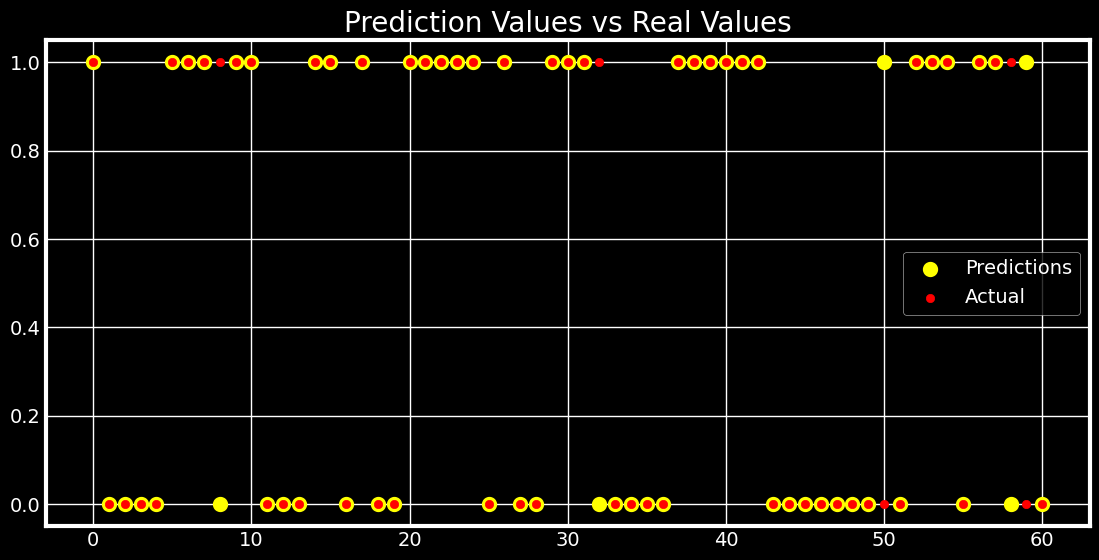

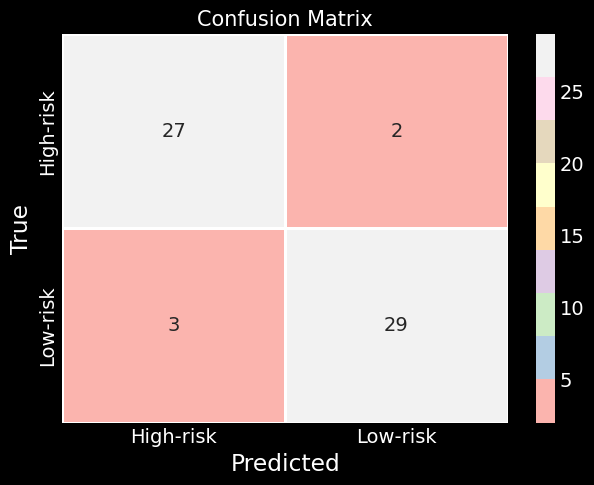

Precision: 0.935 
Recall: 0.906 
F1-Score: 0.921 
Accuracy: 91.803 %
Mean Square Error: 0.082


In [38]:
#Build Model
start=time.time()

model_RF = RandomForestClassifier(n_estimators=300,criterion="gini",random_state=5,max_depth=100)
model_RF.fit(X_train,Y_train)
Y_pred=model_RF.predict(X_test)

end=time.time()

model_RF_time=end-start
model_RF_accuracy=round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy

print(f"Execution time of model: {round((model_RF_time),5)} seconds")
#Plot and compute metric
compute(Y_pred,Y_test)

## 6 => AdaBoost Classifier

Execution time of model: 0.04735 seconds


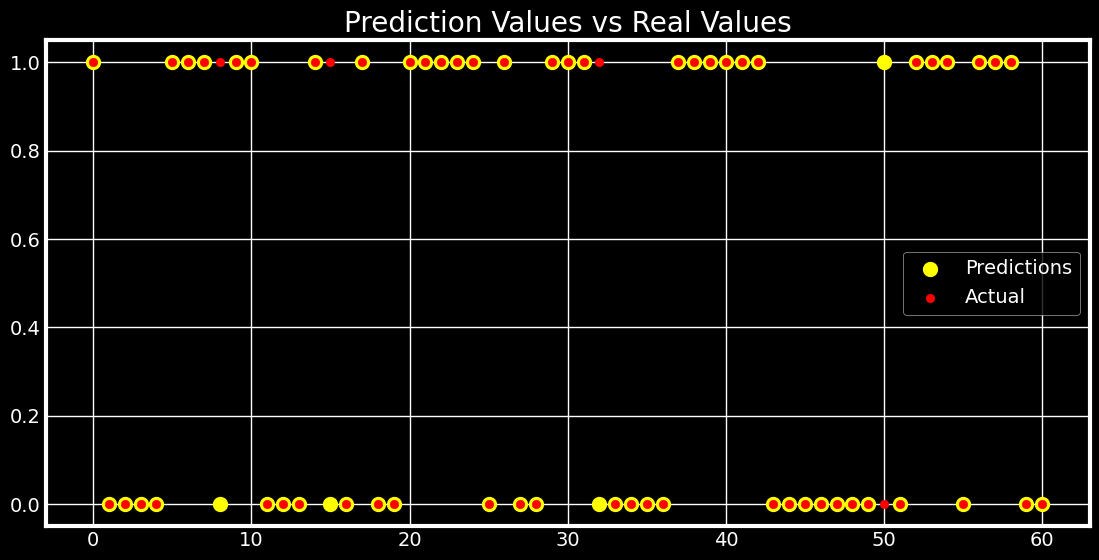

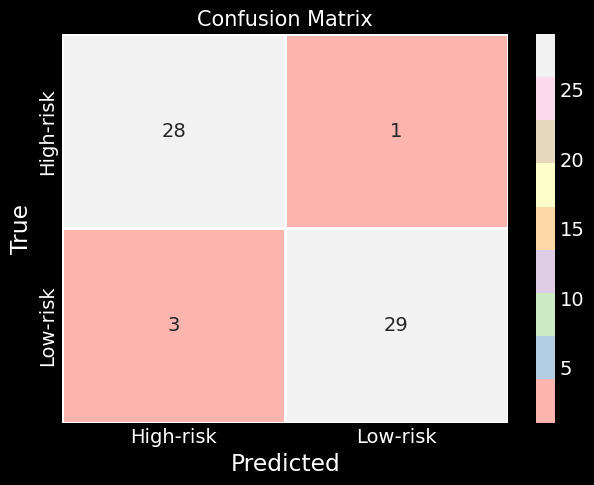

Precision: 0.967 
Recall: 0.906 
F1-Score: 0.935 
Accuracy: 93.443 %
Mean Square Error: 0.066


In [39]:
#Build Model
start=time.time()

model_ADA=AdaBoostClassifier(learning_rate= 0.15,n_estimators= 25)
model_ADA.fit(X_train,Y_train)
Y_pred= model_ADA.predict(X_test)

end=time.time()

model_ADA_time=end-start
model_ADA_accuracy=round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy

print(f"Execution time of model: {round((model_ADA_time),5)} seconds")
#Plot and compute metric
compute(Y_pred,Y_test)

## 7 => Gradient Boosting Classifier

Execution time of model: 0.0247 seconds


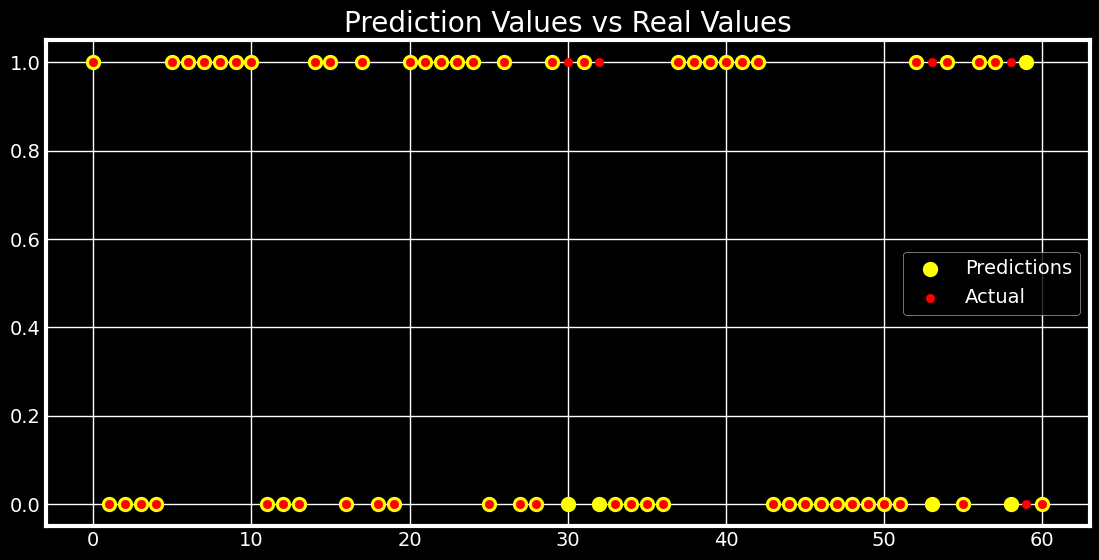

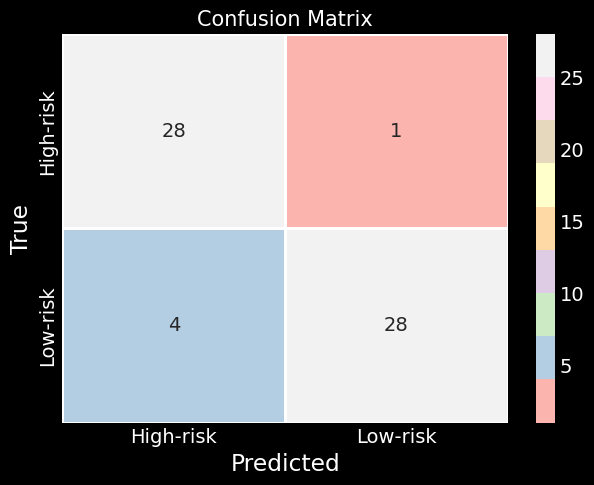

Precision: 0.966 
Recall: 0.875 
F1-Score: 0.918 
Accuracy: 91.803 %
Mean Square Error: 0.082


In [40]:
#Build Model
start=time.time()

model_GB= GradientBoostingClassifier(random_state=10,n_estimators=20,learning_rate=0.29,loss="deviance")
model_GB.fit(X_train,Y_train)
Y_pred= model_GB.predict(X_test)

end=time.time()

model_GB_time=end-start
model_GB_accuracy=round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy

print(f"Execution time of model: {round((model_GB_time),5)} seconds")
#Plot and compute metric
compute(Y_pred,Y_test)

## 8 => XGBoost Classifier

Execution time of model: 0.03295 seconds


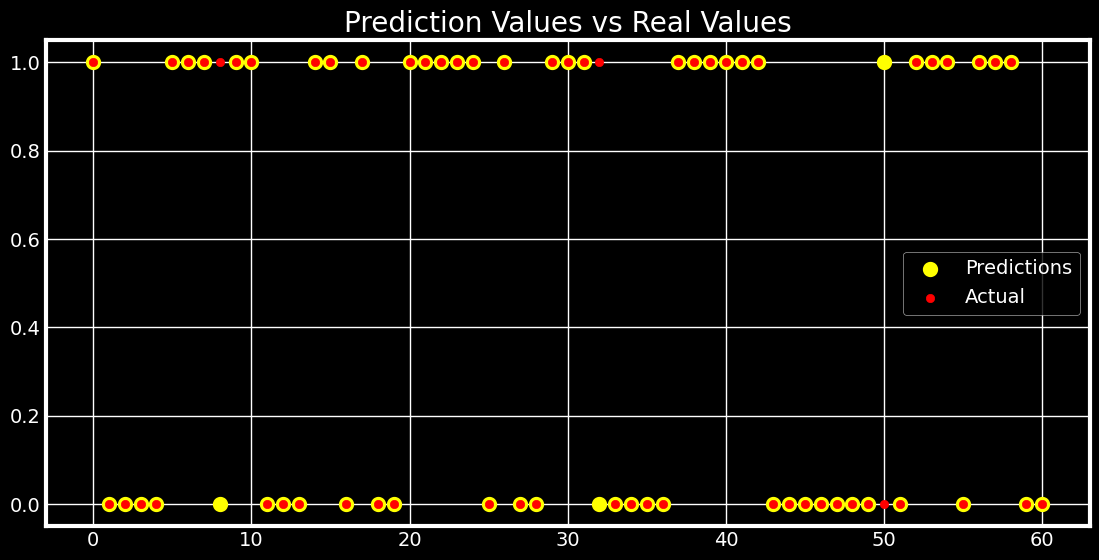

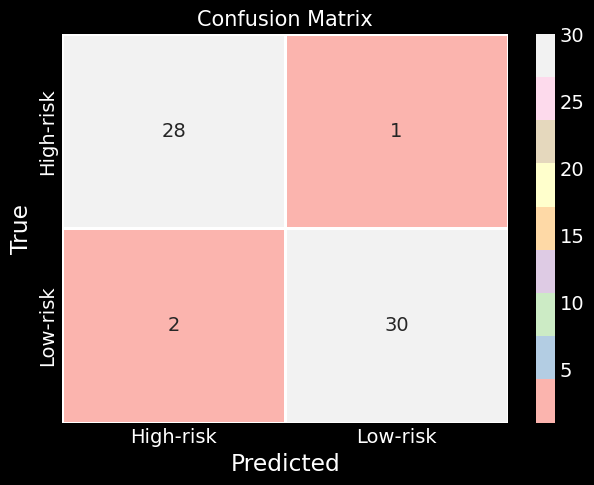

Precision: 0.968 
Recall: 0.938 
F1-Score: 0.952 
Accuracy: 95.082 %
Mean Square Error: 0.049


In [41]:
#Build Model
start=time.time()

model_xgb = XGBClassifier(objective='binary:logistic',learning_rate=0.1,
                          max_depth=1,
                          n_estimators = 50,
                          colsample_bytree = 0.5)
model_xgb.fit(X_train,Y_train)
Y_pred = model_xgb.predict(X_test)

end=time.time()

model_xgb_time=end-start
model_xgb_accuracy=round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy

print(f"Execution time of model: {round((model_xgb_time),5)} seconds")
#Plot and compute metric
compute(Y_pred,Y_test)

## 9 => MLPClassifier

Execution time of model: 0.5303 seconds


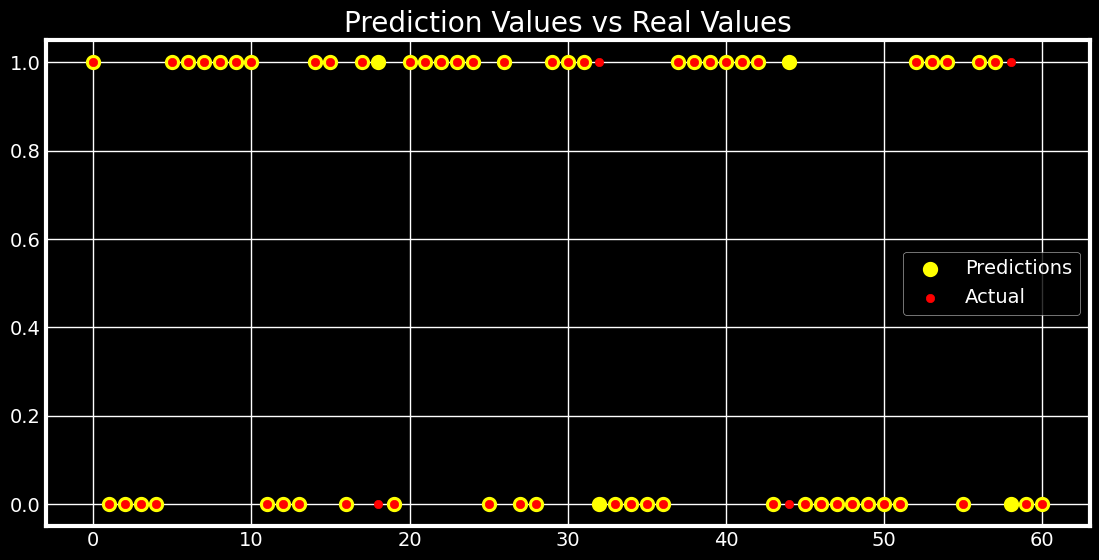

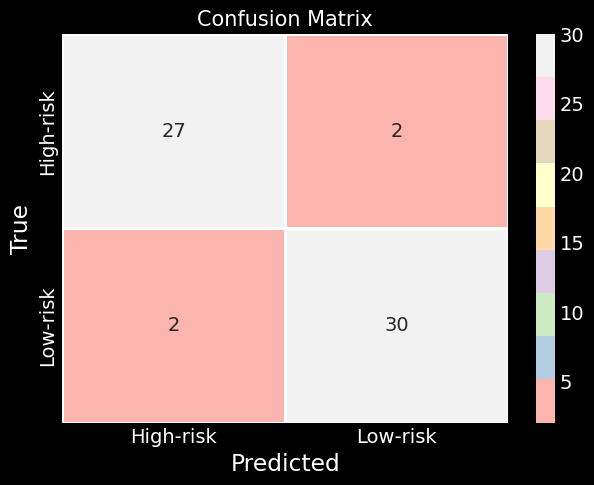

Precision: 0.938 
Recall: 0.938 
F1-Score: 0.938 
Accuracy: 93.443 %
Mean Square Error: 0.066


In [42]:
#Build Model
start=time.time()

model_MLP = MLPClassifier(random_state=48,hidden_layer_sizes=(150,100,50), max_iter=150,activation = 'relu',solver='adam')
model_MLP.fit(X_train, Y_train)
Y_pred=model_MLP.predict(X_test)

end=time.time()

model_MLP_time=end-start
model_MLP_accuracy=round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy

print(f"Execution time of model: {round((model_MLP_time),5)} seconds")
#Plot and compute metric
compute(Y_pred,Y_test)

## 10 => K-Means



* [K-Means clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

* [K Means algorithm](https://stanford.edu/~cpiech/cs221/handouts/kmeans.html)

Execution time of model: 0.17062 seconds



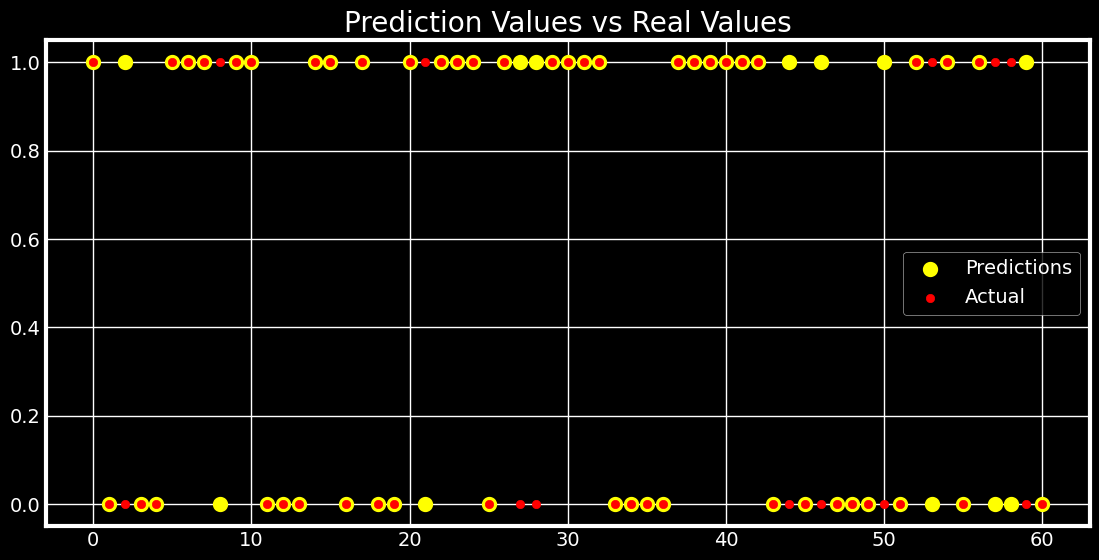

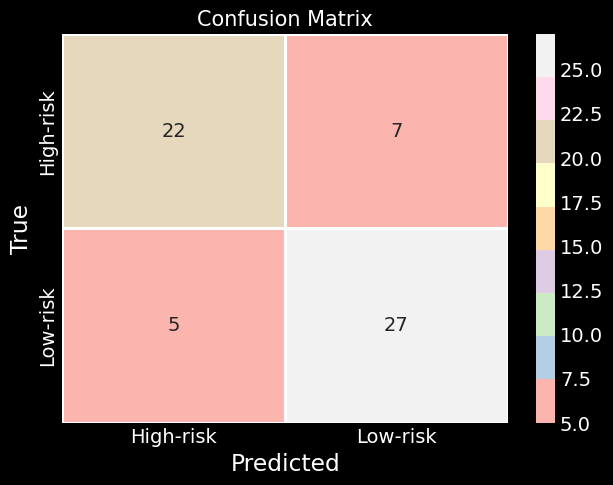

Precision: 0.794 
Recall: 0.844 
F1-Score: 0.818 
Accuracy: 80.328 %
Mean Square Error: 0.197


In [43]:
#Build Model
start = time.time()

model_kmeans= KMeans(n_clusters=2, random_state=42) # centers=3
model_kmeans.fit(X_train,Y_train)
Y_pred= model_kmeans.predict(X_test)

end=time.time()

model_kmeans_time=end-start
model_kmeans_accuracy=round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy

print(f"Execution time of model: {round((model_kmeans_time),5)} seconds\n")
#Plot and compute metrics
compute(Y_pred,Y_test)

## 11 => Naive Bayes



[applying Bayes’ theorem](https://scikit-learn.org/stable/modules/naive_bayes.html)


Execution time of model: 0.00161 seconds



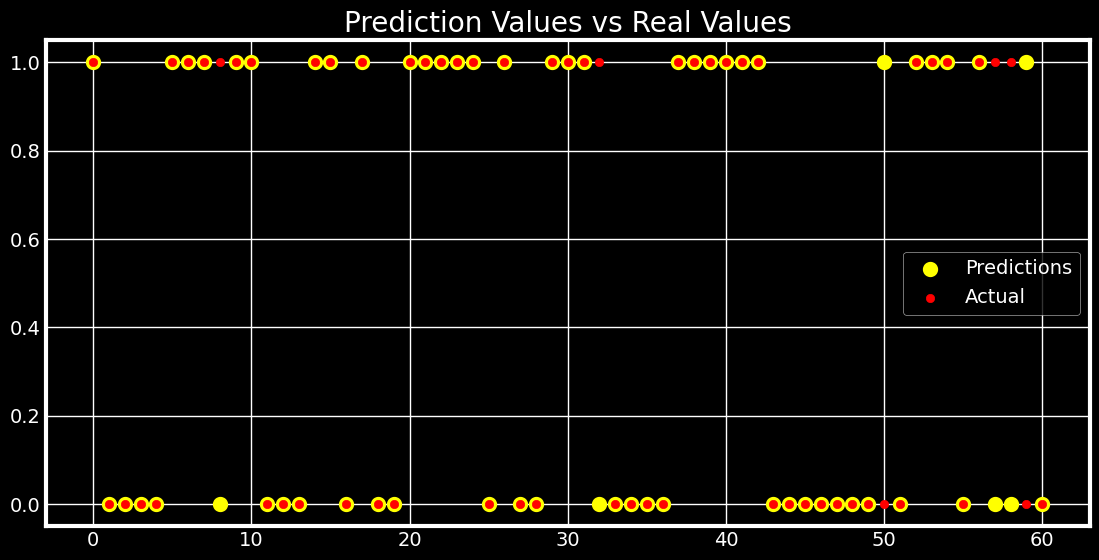

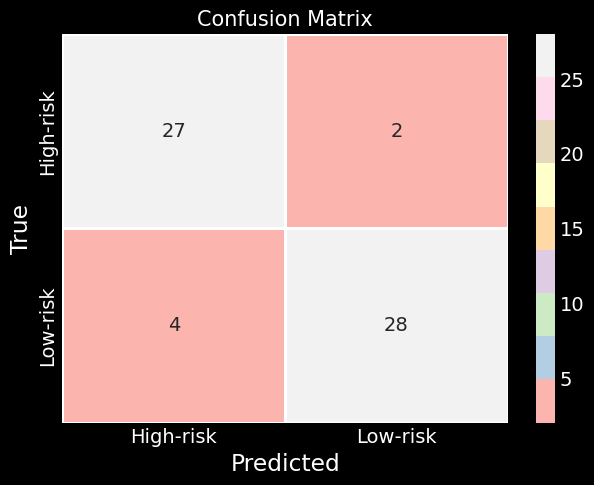

Precision: 0.933 
Recall: 0.875 
F1-Score: 0.903 
Accuracy: 90.164 %
Mean Square Error: 0.098


In [44]:
#Build Model
start = time.time()

model_gnb= GaussianNB()
model_gnb.fit(X_train,Y_train)
Y_pred= model_gnb.predict(X_test)

end=time.time()

model_gnb_time=end-start
model_gnb_accuracy=round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy

print(f"Execution time of model: {round((model_gnb_time),5)} seconds\n")
#Plot and compute metrics
compute(Y_pred,Y_test)

## 12 => Twin-SVM

### TVSVM module

In [45]:
import os, sys, importlib

user = "arnav-kansal"
repo = "Twin-SVM"

# remove local directory if it already exists
if os.path.isdir(repo):
    !rm -rf {repo}

!git clone https://github.com/{user}/{repo}.git

Cloning into 'Twin-SVM'...
remote: Enumerating objects: 32, done.
remote: Total 32 (delta 0), reused 0 (delta 0), pack-reused 32
Unpacking objects: 100% (32/32), 10.43 KiB | 533.00 KiB/s, done.


In [46]:
src_dir = "Twin-SVM"

#path = f"{repo}/{src_dir}"
path = f"{src_dir}"

if not path in sys.path:
    sys.path.insert(1, path)

# list all directories in the Python path
print("\n".join(["'" + path + "'" for path in sys.path]))

'/content'
'Twin-SVM'
'/env/python'
'/usr/lib/python39.zip'
'/usr/lib/python3.9'
'/usr/lib/python3.9/lib-dynload'
''
'/usr/local/lib/python3.9/dist-packages'
'/usr/lib/python3/dist-packages'
'/usr/local/lib/python3.9/dist-packages/IPython/extensions'
'/root/.ipython'


In [47]:
pyfile = "TVSVM.py"

mymodule = importlib.import_module(pyfile.rstrip(".py"))
help(mymodule)

Help on module TVSVM:

NAME
    TVSVM

CLASSES
    sklearn.base.BaseEstimator(builtins.object)
        TwinSVMClassifier(sklearn.base.BaseEstimator, sklearn.base.ClassifierMixin)
    sklearn.base.ClassifierMixin(builtins.object)
        TwinSVMClassifier(sklearn.base.BaseEstimator, sklearn.base.ClassifierMixin)
    
    class TwinSVMClassifier(sklearn.base.BaseEstimator, sklearn.base.ClassifierMixin)
     |  TwinSVMClassifier(Epsilon1=0.1, Epsilon2=0.1, C1=1, C2=1, kernel_type=0, kernel_param=1, regulz1=1, regulz2=1, fuzzy=0, _estimator_type='classifier')
     |  
     |  Method resolution order:
     |      TwinSVMClassifier
     |      sklearn.base.BaseEstimator
     |      sklearn.base.ClassifierMixin
     |      builtins.object
     |  
     |  Methods defined here:
     |  
     |  __init__(self, Epsilon1=0.1, Epsilon2=0.1, C1=1, C2=1, kernel_type=0, kernel_param=1, regulz1=1, regulz2=1, fuzzy=0, _estimator_type='classifier')
     |      Initialize self.  See help(type(self)) for 

In [48]:
!pip install numpy
!pip install sklearn
!pip install cvxopt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [49]:
from TVSVM import TwinSVMClassifier

In [50]:
# example SVM without kernel
params1 = {'Epsilon1': 0.1, 'Epsilon2': 0.1, 'C1': 1, 'C2': 1,'kernel_type':0,'kernel_param': 1,'fuzzy':0}

# example SVM RBF kernel params
params2 = {'Epsilon1': 0.1, 'Epsilon2': 0.1, 'C1': 1, 'C2': 1,'kernel_type':3,'kernel_param': 2,'fuzzy':0}

# example SVM RBF kernel params with fuzzy membership function
params3 = {'Epsilon1': 0.1, 'Epsilon2': 0.1, 'C1': 1, 'C2': 1,'kernel_type':3,'kernel_param': 2,'fuzzy':1}


### Model

Execution time of model: 0.90547 seconds



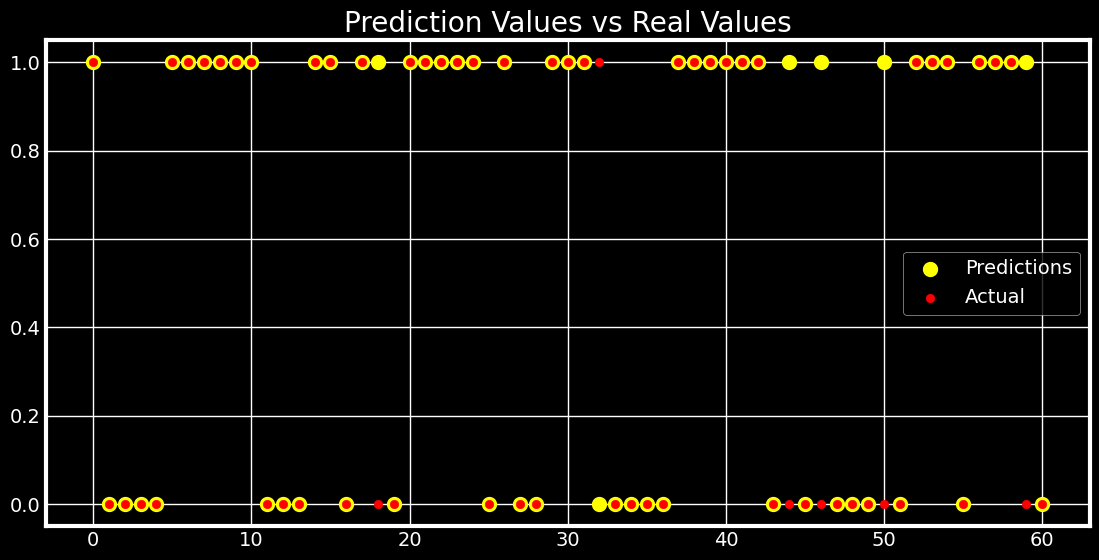

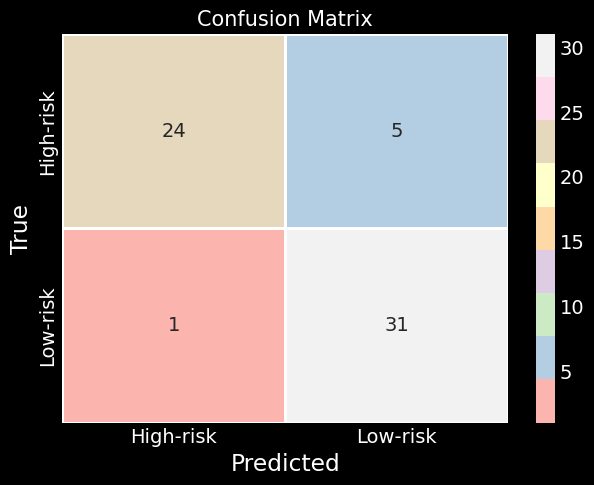

Precision: 0.861 
Recall: 0.969 
F1-Score: 0.912 
Accuracy: 90.164 %
Mean Square Error: 0.098


In [51]:
#Build Model
start = time.time()

model_clf= TwinSVMClassifier(**params2)
model_clf.fit(X_train,Y_train)
Y_pred= model_clf.predict(X_test)

end=time.time()

model_clf_time=end-start
model_clf_accuracy=round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy

print(f"Execution time of model: {round((model_clf_time),5)} seconds\n")
#Plot and compute metrics
compute(Y_pred,Y_test)

## 13 => Ordinary Least Squares

In [52]:
#Build Model
start = time.time()

model_reg= linear_model.LinearRegression()
model_reg.fit(X_train,Y_train)
Y_pred= model_reg.predict(X_test)

end=time.time()

model_reg_time=end-start
print(f"Execution time of model: {round((model_reg_time),5)} seconds\n")

Execution time of model: 0.01544 seconds



In [53]:
# The coefficients
print("Coefficients: \n", model_reg.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(Y_test, Y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(Y_test, Y_pred))

# Plot outputs
#plt.scatter(X_test, Y_test, color="black")
#plt.plot(X_test, Y_pred, color="blue", linewidth=3)

#plt.xticks(())
#plt.yticks(())

#plt.show()

Coefficients: 
 [-0.00126864 -0.19908919  0.34876685 -0.2147182  -0.13956992  0.01891169
  0.10844985  0.38726    -0.13092201 -0.41403649  0.14693615 -0.35585873
 -0.3311244 ]
Mean squared error: 0.07
Coefficient of determination: 0.71


All your commented-out models are not classifiers but regression models, for which accuracy is meaningless.
[stackoverflow](https://stackoverflow.com/a/54451414/10198122)

## 14 => Least Squares Support Vector Machine

### LSSVM module

In [54]:
import os, sys, importlib

user = "RomuloDrumond"
repo = "LSSVM"

# remove local directory if it already exists
if os.path.isdir(repo):
    !rm -rf {repo}

!git clone https://github.com/{user}/{repo}.git

Cloning into 'LSSVM'...
remote: Enumerating objects: 155, done.
remote: Counting objects: 100% (96/96), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 155 (delta 47), reused 56 (delta 20), pack-reused 59
Receiving objects: 100% (155/155), 402.86 KiB | 4.43 MiB/s, done.
Resolving deltas: 100% (66/66), done.


In [55]:
src_dir = "LSSVM"

#path = f"{repo}/{src_dir}"
path = f"{src_dir}"

if not path in sys.path:
    sys.path.insert(1, path)

# list all directories in the Python path
print("\n".join(["'" + path + "'" for path in sys.path]))

'/content'
'LSSVM'
'Twin-SVM'
'/env/python'
'/usr/lib/python39.zip'
'/usr/lib/python3.9'
'/usr/lib/python3.9/lib-dynload'
''
'/usr/local/lib/python3.9/dist-packages'
'/usr/lib/python3/dist-packages'
'/usr/local/lib/python3.9/dist-packages/IPython/extensions'
'/root/.ipython'


In [56]:
pyfile = "lssvm/LSSVC.py"

mymodule = importlib.import_module(pyfile.rstrip(".py"))
help(mymodule)

ModuleNotFoundError: ignored

In [ ]:
!pip install numpy
!pip install sklearn
!pip install cvxopt

In [ ]:
from lssvm import LSSVC

In [ ]:
# example SVM without kernel
params1 = {'Epsilon1': 0.1, 'Epsilon2': 0.1, 'C1': 1, 'C2': 1,'kernel_type':0,'kernel_param': 1,'fuzzy':0}

# example SVM RBF kernel params
params2 = {'Epsilon1': 0.1, 'Epsilon2': 0.1, 'C1': 1, 'C2': 1,'kernel_type':3,'kernel_param': 2,'fuzzy':0}

# example SVM RBF kernel params with fuzzy membership function
params3 = {'Epsilon1': 0.1, 'Epsilon2': 0.1, 'C1': 1, 'C2': 1,'kernel_type':3,'kernel_param': 2,'fuzzy':1}


### Model

In [ ]:
#Build Model
start = time.time()

model_clf= TwinSVMClassifier(**params2)
model_clf.fit(X_train,Y_train)
Y_pred= model_clf.predict(X_test)

end=time.time()

model_clf_time=end-start
model_clf_accuracy=round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy

print(f"Execution time of model: {round((model_clf_time),5)} seconds\n")
#Plot and compute metrics
compute(Y_pred,Y_test)



---



## Compare Accuracy and Execution Time


 بهترین پارامترها و حالت تصادفی برای هر مدل با استفاده از تابع 

**checkRS()** 

زیر محاسبه شد.

In [ ]:
def checkRS():

    mse_dict={}  #Root mean square dictionary
    acc_dict={}  #Accuracy dictionary

    for n in range(25,400,25):
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=65)
        model_MLP = MLPClassifier(random_state=48,hidden_layer_sizes=(150,100,50), max_iter=n,activation = 'relu',solver='adam')
        model_MLP.fit(X_train, Y_train)
        Y_pred=model_MLP.predict(X_test)
        acc=accuracy_score(Y_test,Y_pred)
        mse=mean_squared_error(Y_test,Y_pred)
        mse_dict.update({n:round(mse,3)})
        acc_dict.update({n:round((acc*100),3)})

    #Mean Square Error
    lowest=min(mse_dict.values())
    res = [key for key in mse_dict if mse_dict[key] == lowest]
    mse_list=mse_dict.items()
    k,v = zip(*mse_list) 
    print("RMSE is lowest at {} for n: {} ".format(round((lowest),3),res))

    #Plot RMSE values
    plt.figure(figsize=(12,6))
    #plt.scatter(res,lowest,color="red",lw=5)
    plt.plot(k,v)
    plt.xlabel("Random State")
    plt.ylabel("RMSE")
    plt.grid(True)
    plt.show()

    #Accuracy
    highest=max(acc_dict.values())
    res1= [key for key in acc_dict if acc_dict[key] == highest]
    acc_list=acc_dict.items()
    k1,v1=zip(*acc_list)
    print("Accuracy is highest at {} % for n: {} ".format(highest,res1))
    #Plot Accuracy values
    plt.figure(figsize=(12,6))
    #plt.scatter(res1,highest,color="red",lw=5)
    plt.plot(k1,v1)
    plt.xlabel("Random State")
    plt.ylabel("Accuracy")
    plt.grid(True)
    plt.show()
    
checkRS()

In [ ]:
accuracies={"Logistic regression": model_Log_accuracy,
            "KNN": model_KNN_accuracy,
            "SVM": model_svm_accuracy,
            "Decision Tree": model_tree_accuracy,
            "Random Forest": model_RF_accuracy,
            "Ada Boost": model_ADA_accuracy,
            "Gradient Boosting": model_GB_accuracy,
            "XG Boost": model_xgb_accuracy,
            "MLP Classifier": model_MLP_accuracy,
            "K-Means": model_kmeans_accuracy,
            "Bayes": model_gnb_accuracy,
            "Twin-SVM": model_clf_accuracy}

acc_list=accuracies.items()
k,v = zip(*acc_list) 
temp=pd.DataFrame(index=k,data=v,columns=["Accuracy"])
temp.sort_values(by=["Accuracy"],ascending=False,inplace=True)

#Plot accuracy for different models
plt.figure(figsize=(20,7))
ACC=sns.barplot(y=temp.index,x=temp["Accuracy"],label="Accuracy",edgecolor="violet",linewidth=3,orient="h",palette="twilight_r")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy Comparison")
plt.xlim(80,98)

ACC.spines['left'].set_linewidth(3)
for w in ['right', 'top', 'bottom']:
    ACC.spines[w].set_visible(False)
    
#Write text on barplots
k=0
for ACC in ACC.patches:
    width = ACC.get_width()
    plt.text(width+0.1, (ACC.get_y() + ACC.get_height()-0.3),s="{}%".format(temp["Accuracy"][k]),fontname = 'monospace', fontsize = 14, color = 'violet') 
    k+=1
    
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

So clearly, the boosting algorithms have dominated the accuracy when it comes to the model comparison (Unsurprisingly). <br>

In [ ]:
exe_time={"Logistic regression": model_Log_time,
            "KNN": model_KNN_time,
            "SVM": model_svm_time,
            "Decision Tree": model_tree_time,
            "Random Forest": model_RF_time,
            "Ada Boost": model_ADA_time,
            "Gradient Boosting": model_GB_time,
            "XG Boost": model_xgb_time,
            "MLP Classifier": model_MLP_time,
            "K-Means": model_kmeans_time,
            "Bayes": model_gnb_time,
            "Twin-SVM": model_clf_time,
            "Ordinary Least Squares": model_reg_time}

time_list=exe_time.items()
k,v = zip(*time_list) 
temp1=pd.DataFrame(index=k,data=v,columns=["Time"])
temp1.sort_values(by=["Time"],ascending=False,inplace=True)

#Plot accuracy for different models
plt.figure(figsize=(20,7))
ET=sns.barplot(y=temp1.index,x=temp1["Time"],label="Time",edgecolor="violet",linewidth=3,orient="h",palette="twilight_r")
plt.ylabel("Model")
plt.title("Execution Time Comparison")
ET.spines['left'].set_linewidth(3)
for w in ['right', 'top', 'bottom']:
    ET.spines[w].set_visible(False)

#Write text on barplots
k=0
for ET in ET.patches:
    width = ET.get_width()
    plt.text(width+0.01, (ET.get_y() + ET.get_height()-0.3),s="{}s".format(round((temp1["Time"][k]),3)),fontname = 'monospace', fontsize = 14, color = 'violet') 
    k+=1

plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

<hr><hr>

## __Conclusion:__

1. ما با درک ستون های مجموعه داده حمله قلبی و انجام تجزیه و تحلیل داده ها و تجزیه و تحلیل آماری روی آن شروع کردیم.


2. سپس داده ها را بر اساس همبستگی و محورهای کلی پیش پردازش کردیم.


3. داده های از پیش پردازش شده برای آموزش مدل هایی استفاده شد که دقت و زمان اجرا ذخیره شد و بعداً برای مقایسه مدل ها ترسیم شد.



<hr>